In [1]:
import sys
from pathlib import Path

# Add the notebooks directory to the path
sys.path.append(str(Path.cwd().parent))

from utils import time_filter, get_selected_pods
from charts import cpu_chart, cpu_chart_stacked, cpu_chart_nodes, memory_chart, memory_chart_stacked, memory_chart_nodes, gantt_chart, minio_charts, kafka_charts

import pandas as pd

experiment_name = "experiment05"

start_time = pd.Timestamp("2025-05-30 18:25:00").tz_localize("America/Sao_Paulo")
end_time = pd.Timestamp("2025-05-30 19:20:00").tz_localize("America/Sao_Paulo")

---

# Edge Data

In [2]:
base_path = f"../../data/raw/{experiment_name}/{experiment_name}_edge"
df_container_cpu_usage_seconds_total = pd.read_parquet(base_path + "/container_cpu_usage_seconds_total.parquet")
df_container_memory_usage_bytes = pd.read_parquet(base_path + "/container_memory_usage_bytes.parquet")
df_kube_pod_status_phase = pd.read_parquet(base_path + "/kube_pod_status_phase.parquet")

df_spark_application_running_count = pd.read_parquet(base_path + "/spark_application_running_count.parquet")
df_spark_application_start_latency_seconds_count = pd.read_parquet(base_path + "/spark_application_start_latency_seconds_count.parquet")

kafka_bytes_in = pd.read_parquet(base_path + "/kafka_server_brokertopicmetrics_bytesin_total.parquet")
kafka_bytes_out = pd.read_parquet(base_path + "/kafka_server_brokertopicmetrics_bytesout_total.parquet")
kafka_messages_in = pd.read_parquet(base_path + "/kafka_server_brokertopicmetrics_messagesin_total.parquet")
kafka_requests = pd.read_parquet(base_path + "/kafka_network_requestmetrics_requests_total.parquet")
kafka_requests_errors = pd.read_parquet(base_path + "/kafka_network_requestmetrics_errors_total.parquet")

# === Load all MinIO metric CSVs ===
df_minio_incoming = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_incoming_total.parquet').reset_index(), start_time, end_time)
df_minio_total = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_total.parquet').reset_index(), start_time, end_time)
df_minio_waiting = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_waiting_total.parquet').reset_index(), start_time, end_time)
df_minio_errors = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_errors_total.parquet').reset_index(), start_time, end_time)
df_minio_sent_bytes = time_filter(pd.read_parquet(base_path + '/minio_s3_traffic_sent_bytes.parquet').reset_index(), start_time, end_time)
df_minio_received_bytes = time_filter(pd.read_parquet(base_path + '/minio_s3_traffic_received_bytes.parquet').reset_index(), start_time, end_time)

df_container_cpu_usage_seconds_total = df_container_cpu_usage_seconds_total.reset_index()
df_container_memory_usage_bytes = df_container_memory_usage_bytes.reset_index()
df_kube_pod_status_phase = df_kube_pod_status_phase.reset_index()

kafka_bytes_in = kafka_bytes_in.reset_index()
kafka_bytes_out = kafka_bytes_out.reset_index()
kafka_messages_in = kafka_messages_in.reset_index()
kafka_requests = kafka_requests.reset_index()
kafka_requests_errors = kafka_requests_errors.reset_index()

df_container_cpu_usage_seconds_total = time_filter(df_container_cpu_usage_seconds_total, start_time, end_time)
df_container_memory_usage_bytes = time_filter(df_container_memory_usage_bytes, start_time, end_time)
df_kube_pod_status_phase = time_filter(df_kube_pod_status_phase, start_time, end_time)

kafka_bytes_in = time_filter(kafka_bytes_in, start_time, end_time)
kafka_bytes_out = time_filter(kafka_bytes_out, start_time, end_time)
kafka_messages_in = time_filter(kafka_messages_in, start_time, end_time)
kafka_requests = time_filter(kafka_requests, start_time, end_time)
kafka_requests_errors = time_filter(kafka_requests_errors, start_time, end_time)

selected_pods = get_selected_pods(df_kube_pod_status_phase)

# Filter distributed Minio
selected_pods = [
    pod for pod in selected_pods if not pod.startswith("minio-community")
]

NODE_CPU_LIMITS = {
    "flncpcsrv-k8s-w01": 400.0,
    "flncpcsrv-k8s-w02": 400.0,
    "flncpcsrv-k8s-w03": 400.0,
    "flncpcsrv-k8s-w04": 400.0,
}

NODE_MEMORY_LIMITS = {
    "flncpcsrv-k8s-w01": 16.384,  # 16 GiB
    "flncpcsrv-k8s-w02": 16.384,
    "flncpcsrv-k8s-w03": 16.384,
    "flncpcsrv-k8s-w04": 16.384,
}

df_kube_pod_status_phase = df_kube_pod_status_phase[df_kube_pod_status_phase["pod"].isin(selected_pods)]
df_status_edge = df_kube_pod_status_phase.copy()
df_container_cpu_usage_seconds_total_filtered = df_container_cpu_usage_seconds_total[df_container_cpu_usage_seconds_total["pod"].isin(selected_pods)]
df_cpu_edge = df_container_cpu_usage_seconds_total_filtered.copy()
df_container_memory_usage_bytes_filtered = df_container_memory_usage_bytes[df_container_memory_usage_bytes["pod"].isin(selected_pods)]
df_memory_edge = df_container_memory_usage_bytes_filtered.copy()
df_minio_incoming = df_minio_incoming[df_minio_incoming["pod"].isin(selected_pods)]
df_minio_total = df_minio_total[df_minio_total["pod"].isin(selected_pods)]
df_minio_waiting = df_minio_waiting[df_minio_waiting["pod"].isin(selected_pods)]
df_minio_errors = df_minio_errors[df_minio_errors["pod"].isin(selected_pods)]
df_minio_sent_bytes = df_minio_sent_bytes[df_minio_sent_bytes["pod"].isin(selected_pods)]
df_minio_received_bytes = df_minio_received_bytes[df_minio_received_bytes["pod"].isin(selected_pods)]

In [11]:
cpu_chart(df_container_cpu_usage_seconds_total_filtered, df_kube_pod_status_phase, title="Edge - CPU Usage by Pod - Pipeline Pods", node_cpu_limits=NODE_CPU_LIMITS)

KeyboardInterrupt: 

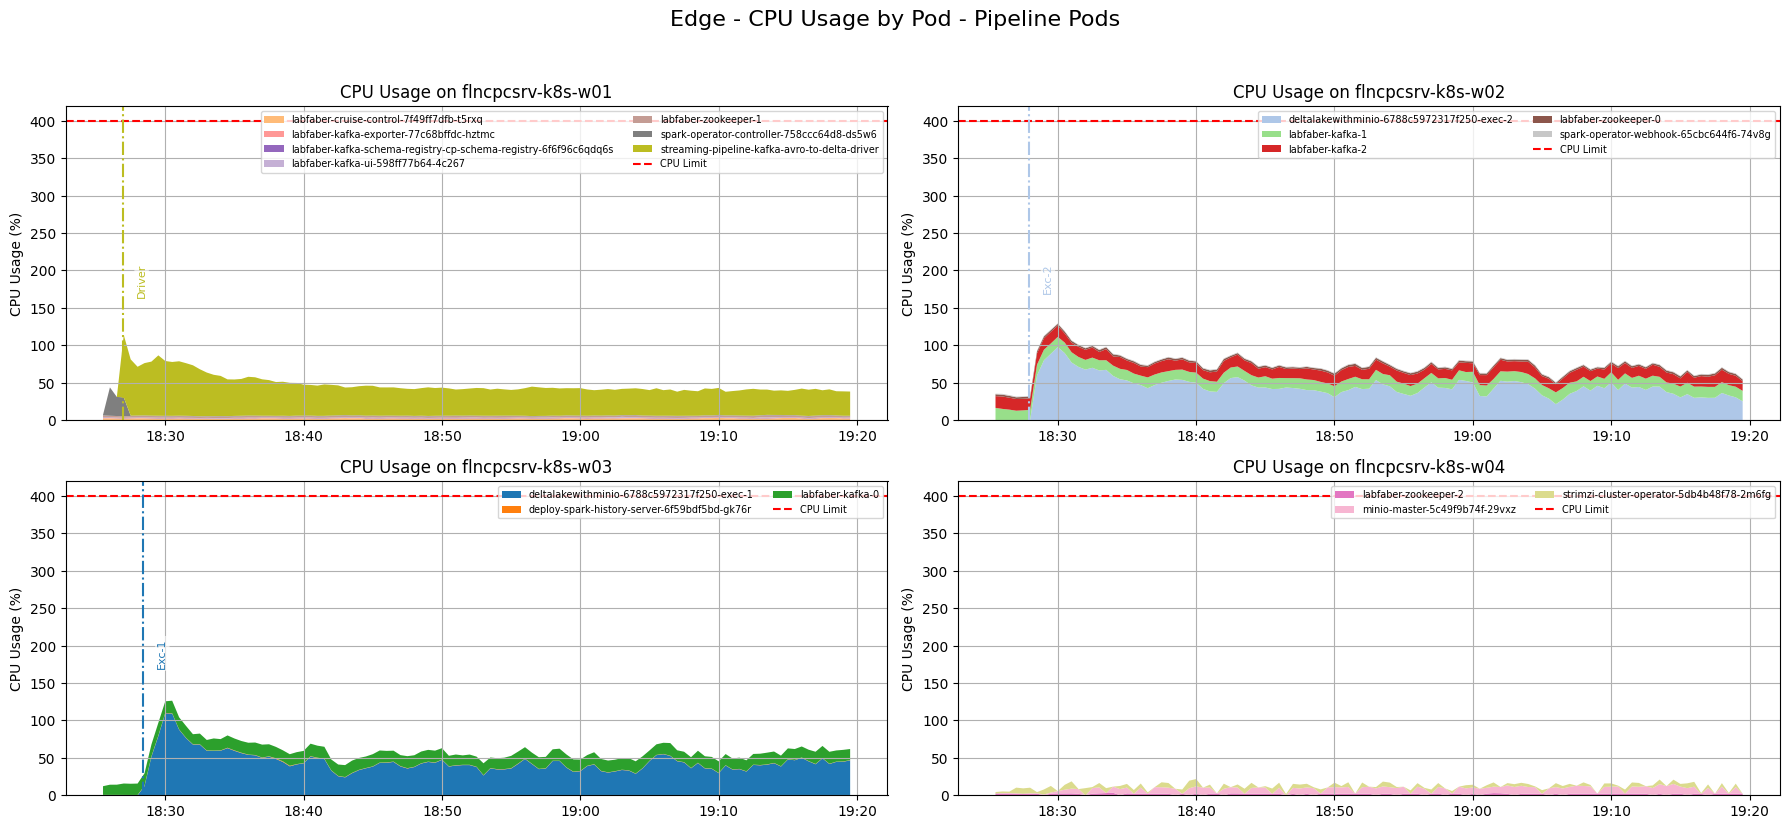

In [ ]:
cpu_chart_stacked(df_container_cpu_usage_seconds_total_filtered, df_kube_pod_status_phase, title="Edge - CPU Usage by Pod - Pipeline Pods", node_cpu_limits=NODE_CPU_LIMITS, save_path="./cpu-edge-pipeline-pods.png")

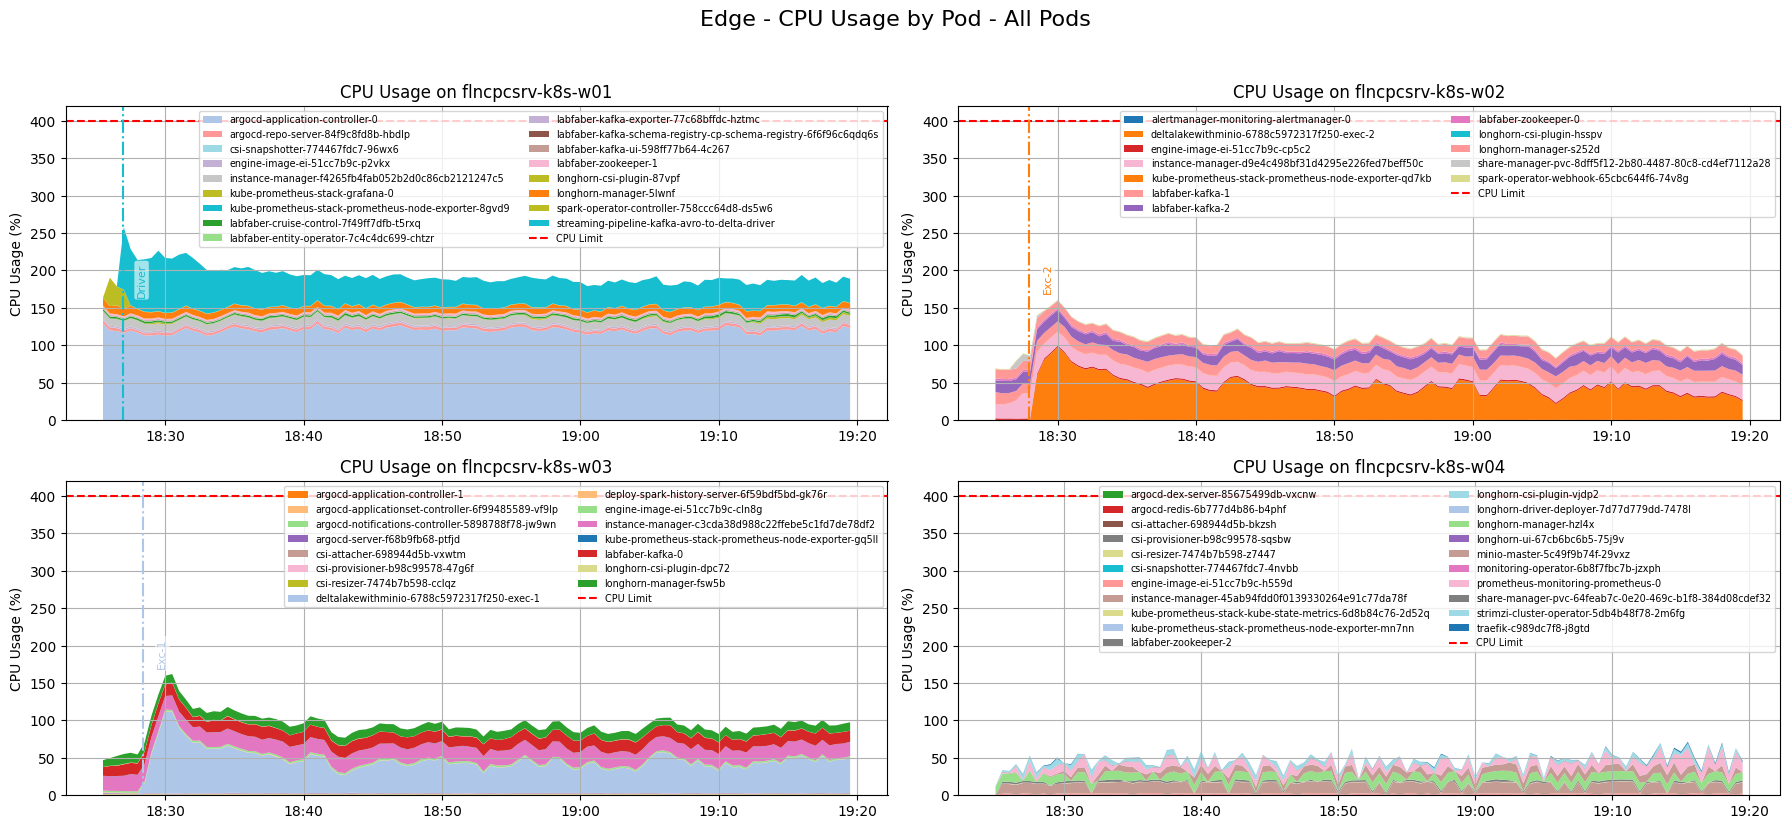

In [ ]:
cpu_chart_stacked(df_container_cpu_usage_seconds_total, df_kube_pod_status_phase, title="Edge - CPU Usage by Pod - All Pods", node_cpu_limits=NODE_CPU_LIMITS, save_path="./cpu-edge-all-pods.png")

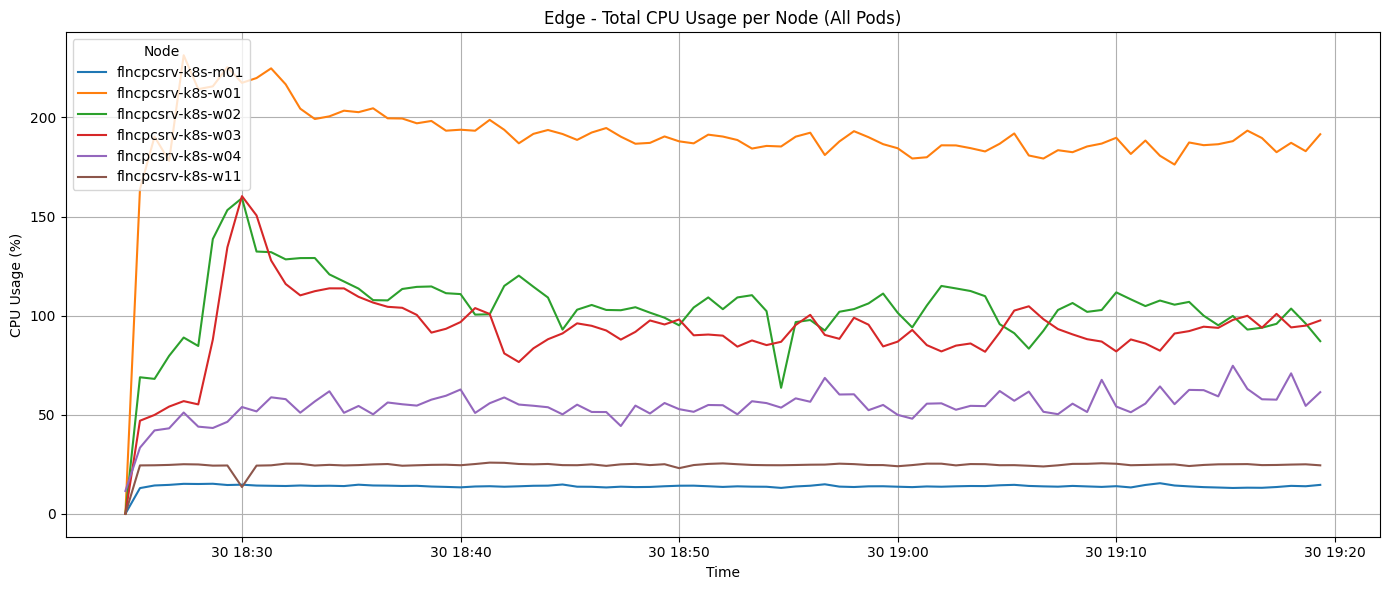

In [ ]:
cpu_chart_nodes(df_container_cpu_usage_seconds_total, "Edge - Total CPU Usage per Node (All Pods)")

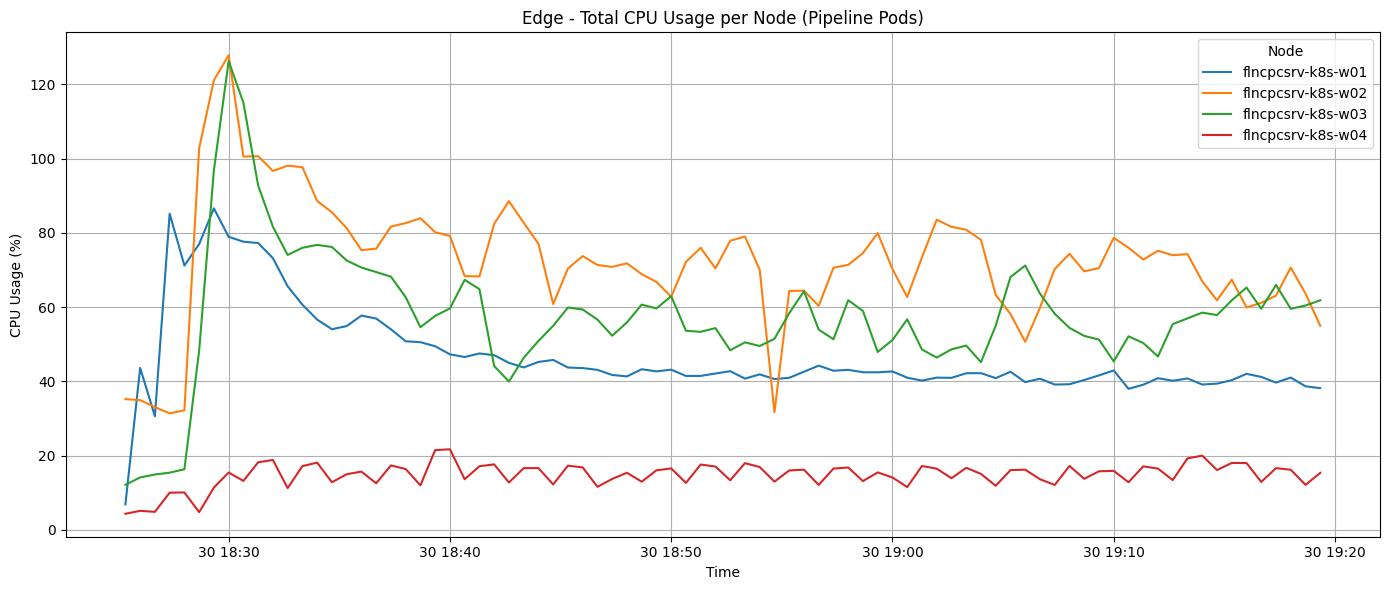

In [ ]:
cpu_chart_nodes(df_container_cpu_usage_seconds_total_filtered, "Edge - Total CPU Usage per Node (Pipeline Pods)", save_path="./cpu-edge-total-pipeline-pods.png")

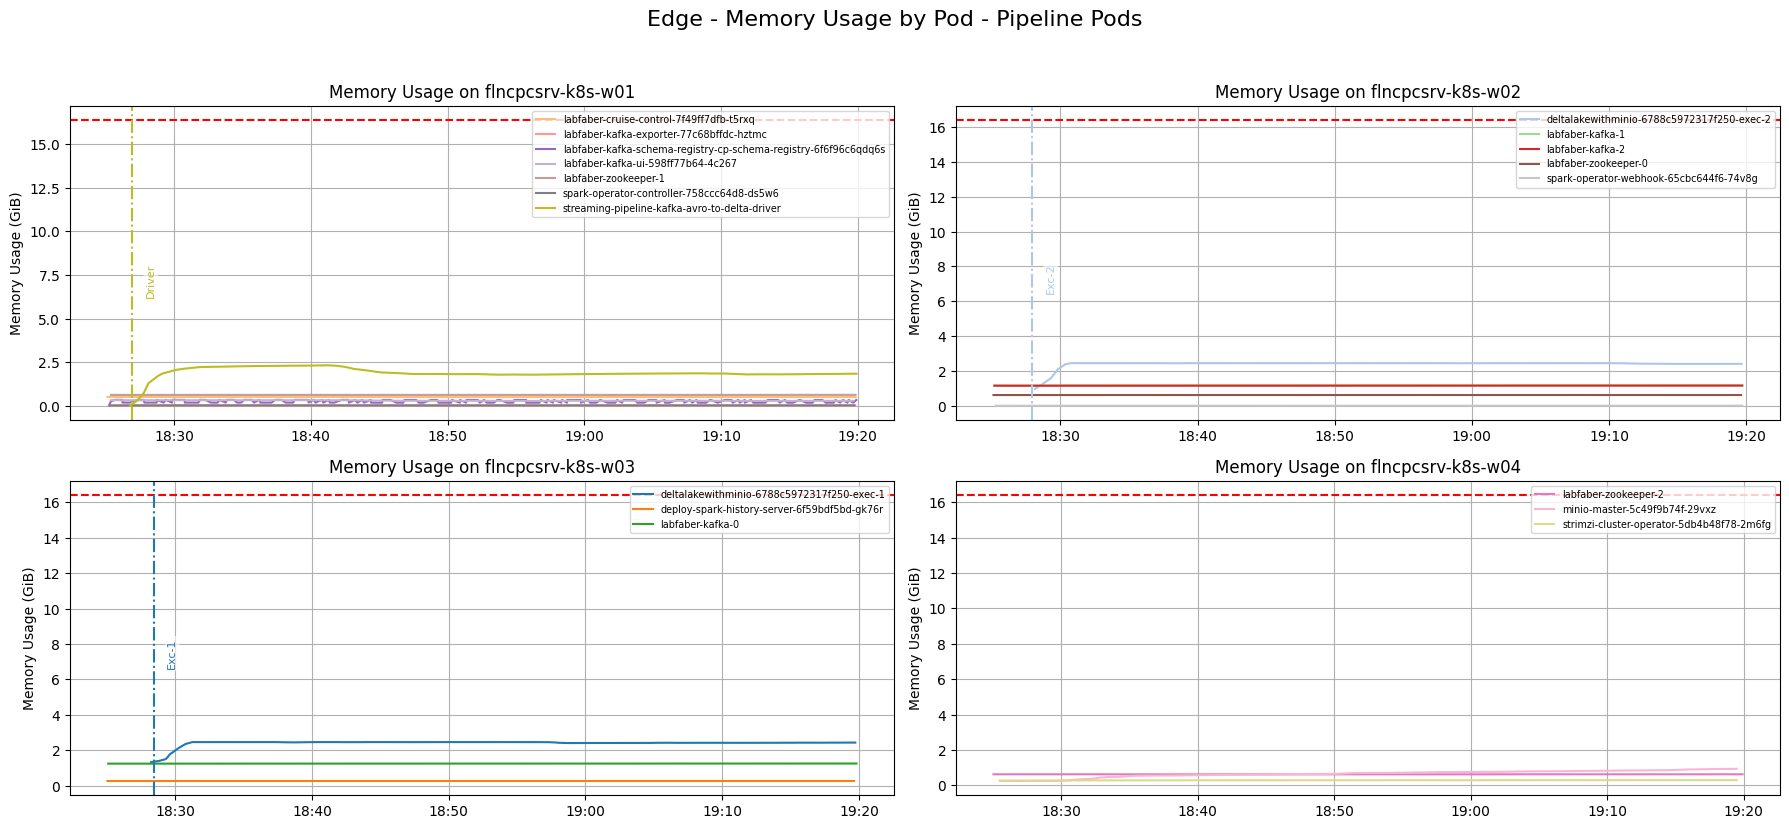

In [ ]:
memory_chart(df_container_memory_usage_bytes_filtered, df_kube_pod_status_phase, title="Edge - Memory Usage by Pod - Pipeline Pods", node_memory_limits=NODE_MEMORY_LIMITS)

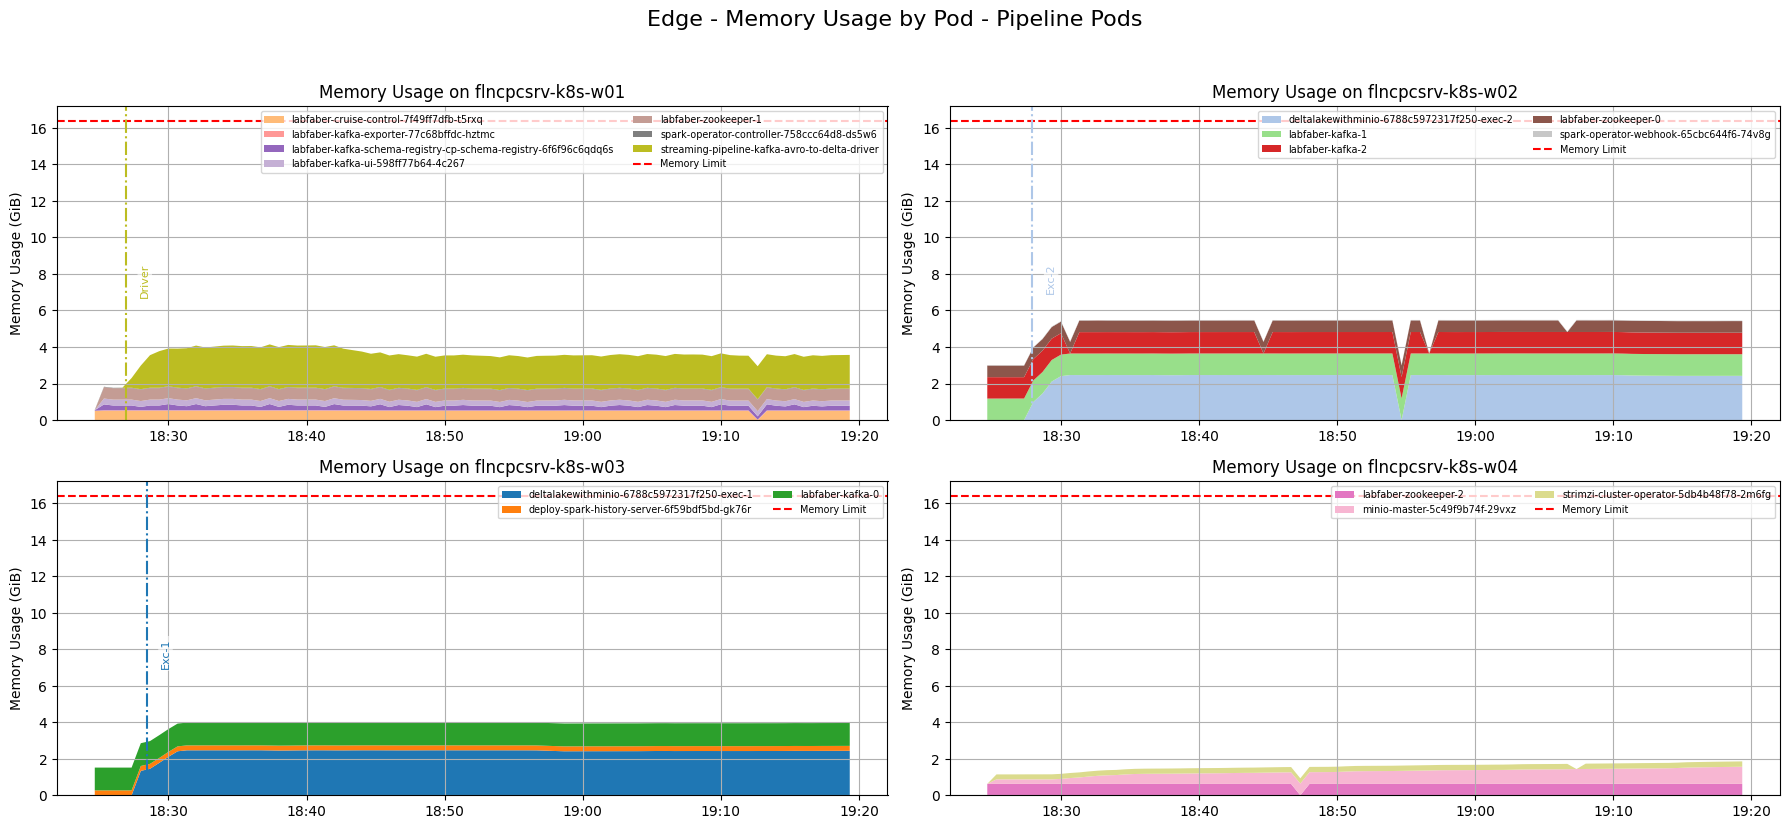

In [ ]:
memory_chart_stacked(df_container_memory_usage_bytes_filtered, df_kube_pod_status_phase, title="Edge - Memory Usage by Pod - Pipeline Pods", node_memory_limits=NODE_MEMORY_LIMITS, save_path="./memory-edge-pipeline-pods.png")

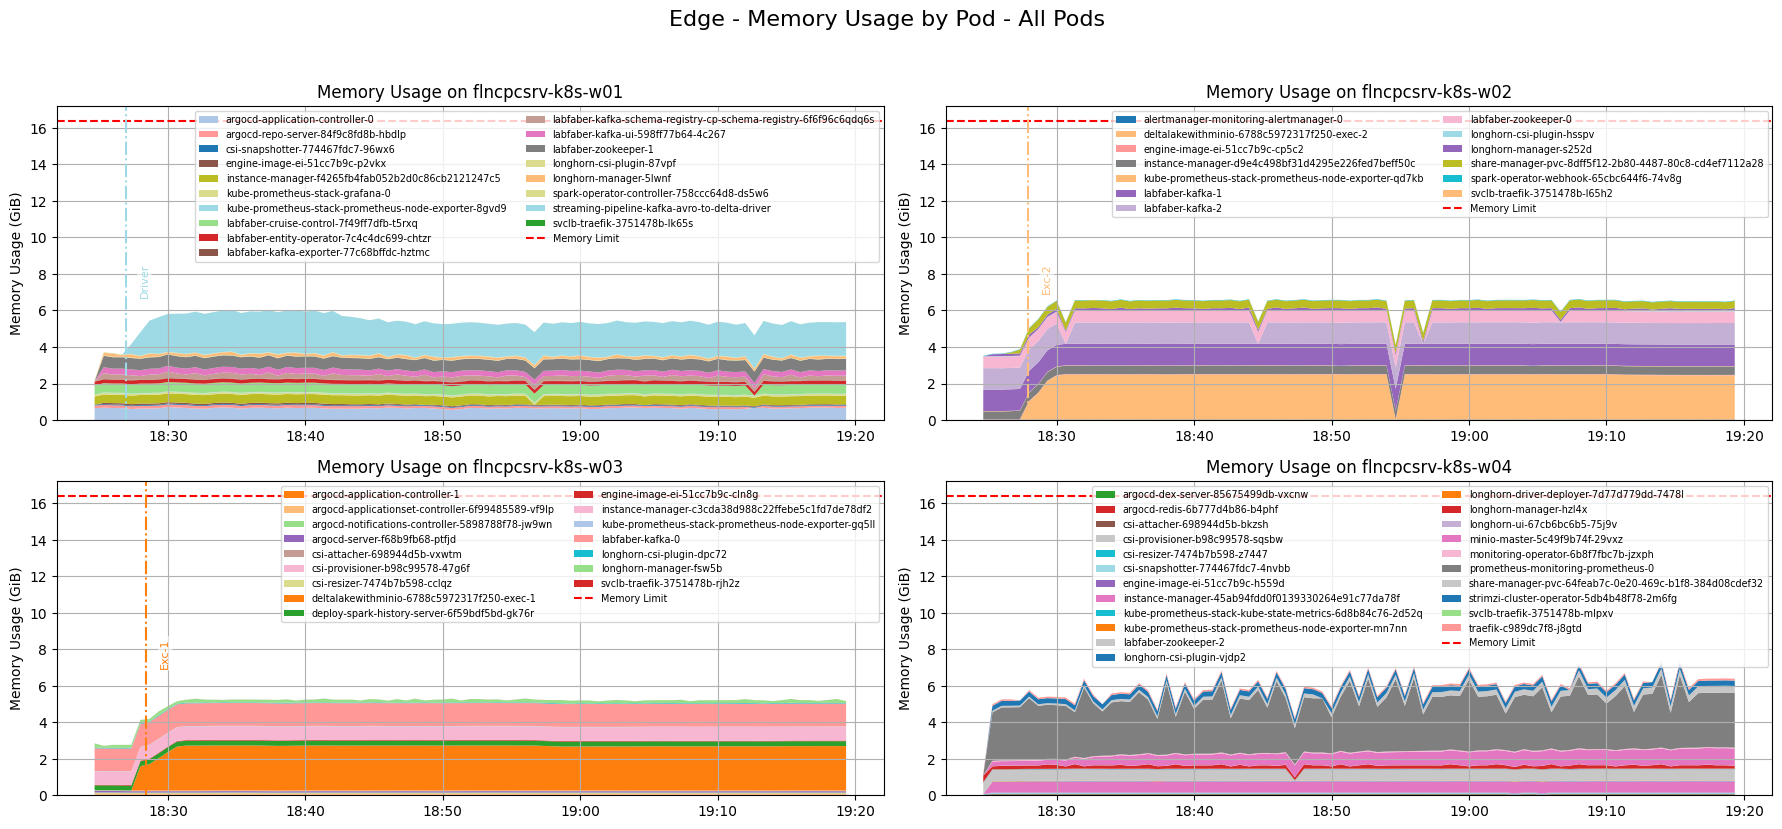

In [ ]:
memory_chart_stacked(df_container_memory_usage_bytes, df_kube_pod_status_phase, title="Edge - Memory Usage by Pod - All Pods", node_memory_limits=NODE_MEMORY_LIMITS, save_path="./memory-edge-all-pods.png")

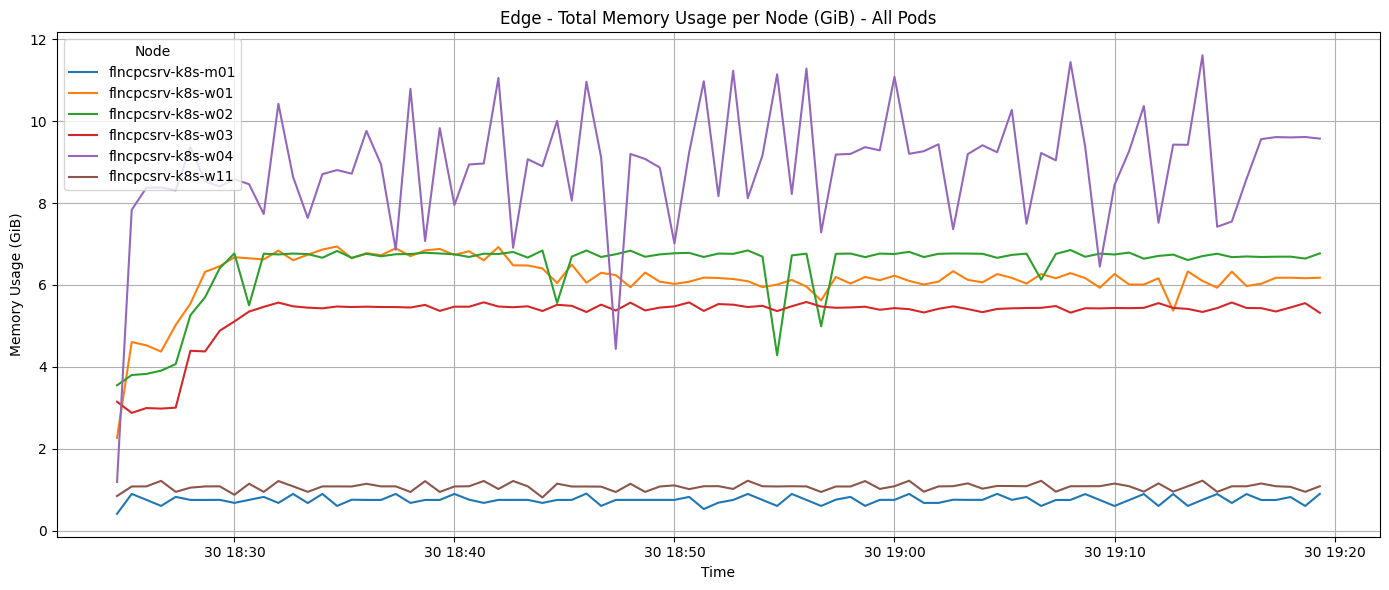

In [ ]:
memory_chart_nodes(df_container_memory_usage_bytes, "Edge - Total Memory Usage per Node (GiB) - All Pods", save_path="./memory-edge-total-all-pods.png")

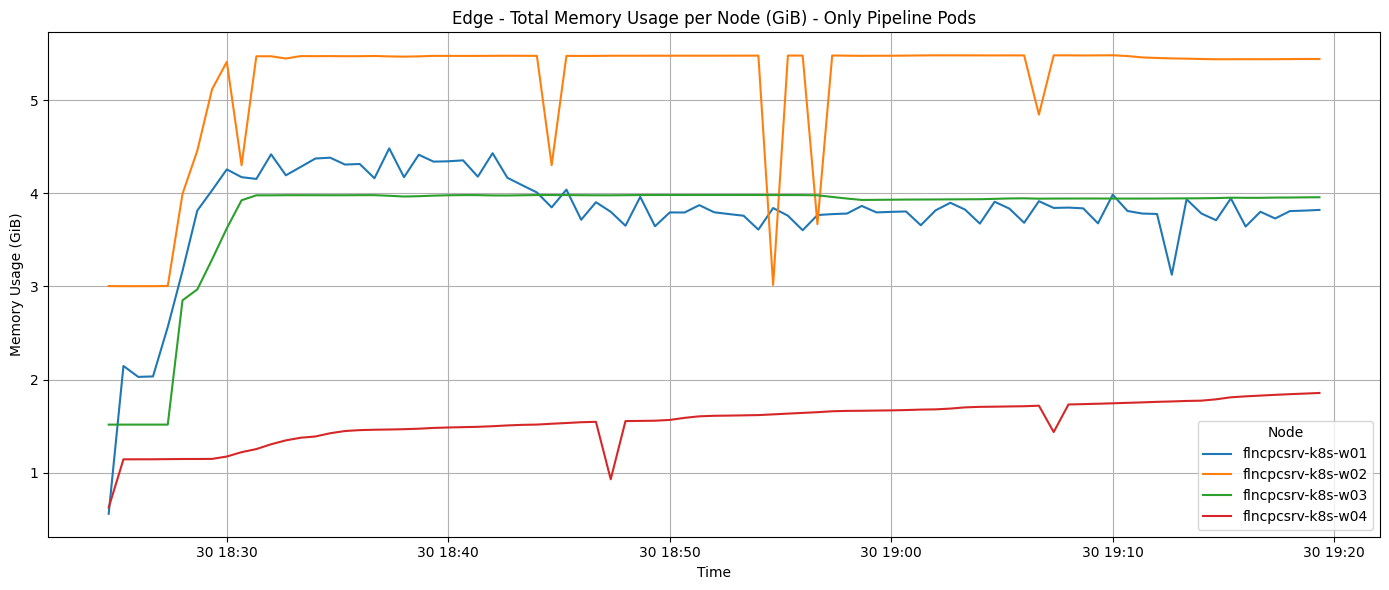

In [ ]:
memory_chart_nodes(df_container_memory_usage_bytes_filtered, "Edge - Total Memory Usage per Node (GiB) - Only Pipeline Pods", save_path="./memory-edge-total-pipeline-pods.png")

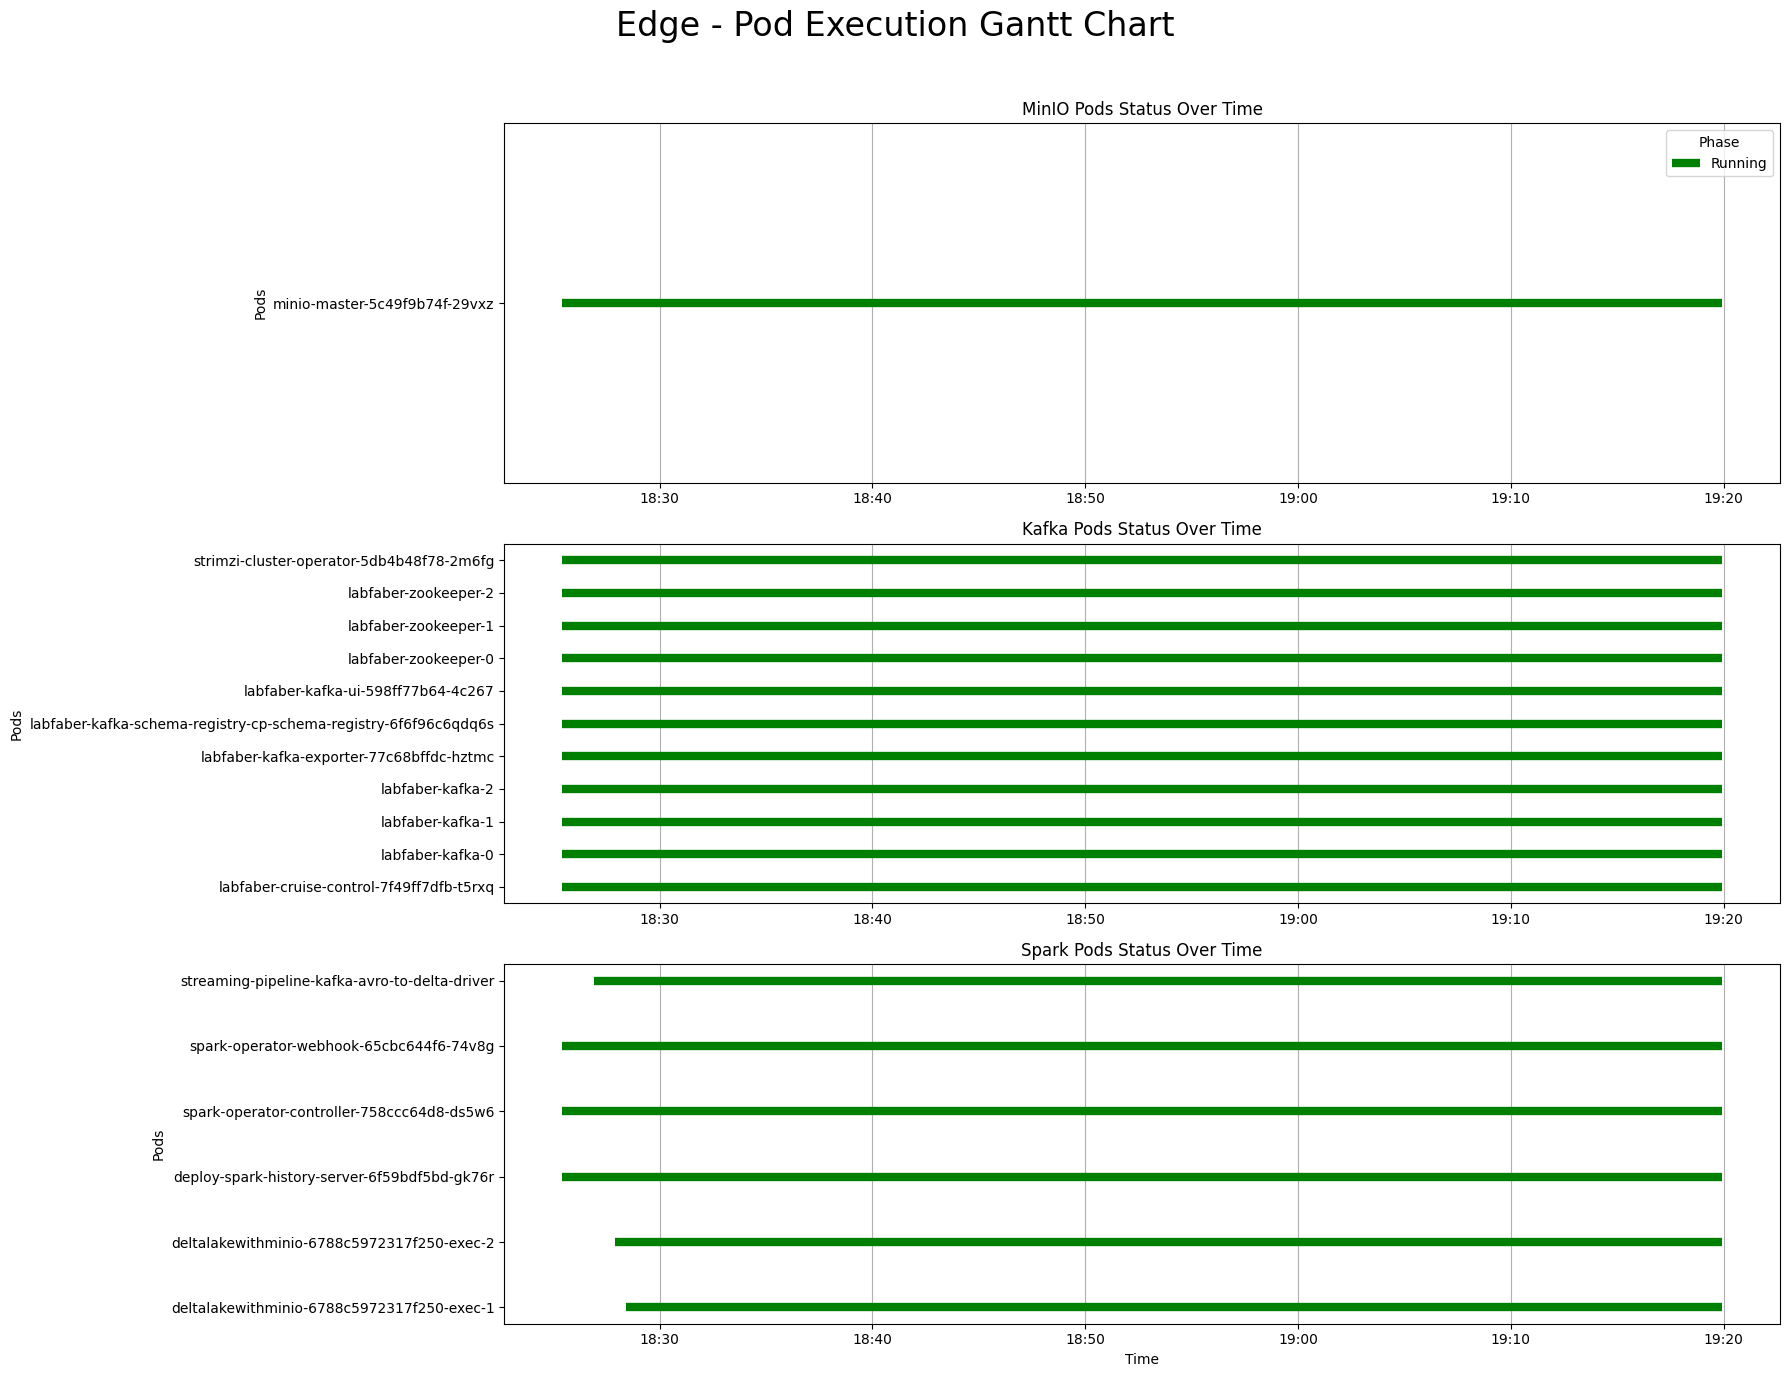

In [ ]:
gantt_chart(df_kube_pod_status_phase, title="Edge - Pod Execution Gantt Chart", save_path="./execution-gantt-edge.png")

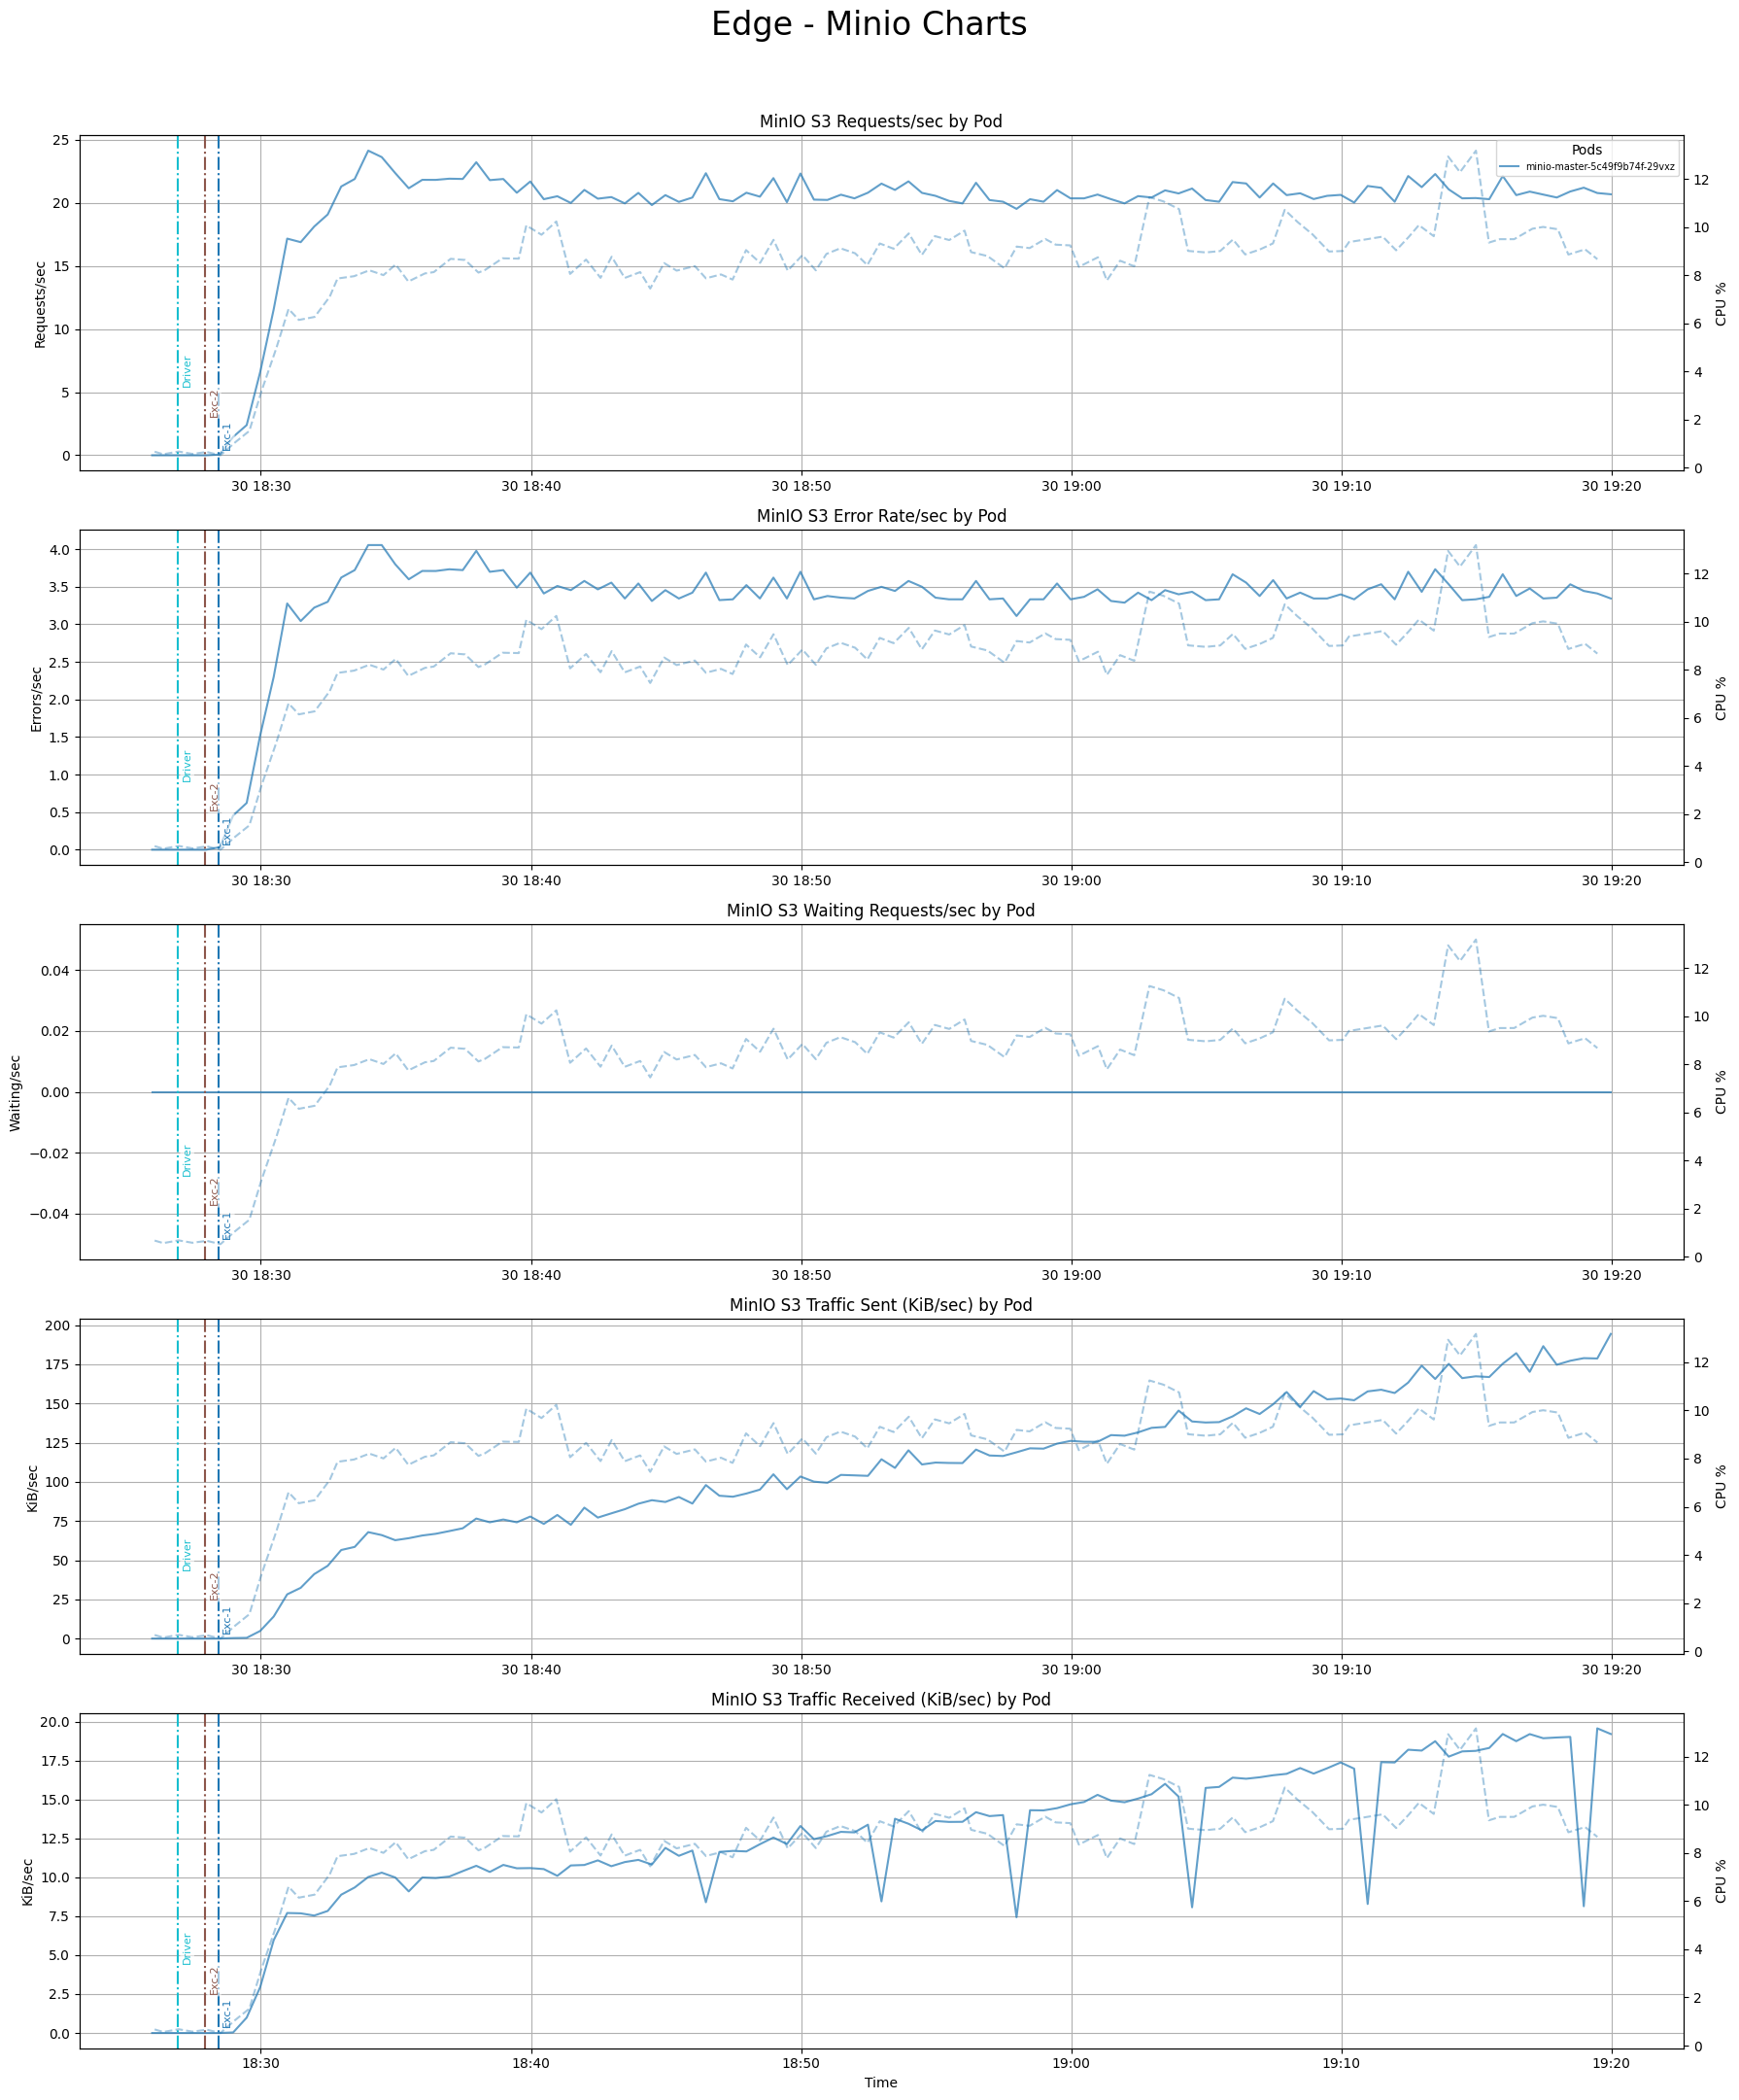

In [ ]:
minio_charts(df_minio_total=df_minio_total, df_minio_errors=df_minio_errors, df_minio_waiting=df_minio_waiting, df_minio_sent_bytes=df_minio_sent_bytes, df_minio_received_bytes=df_minio_received_bytes, df_cpu=df_container_cpu_usage_seconds_total, df_status=df_kube_pod_status_phase, title="Edge - Minio Charts", save_path="./minio-charts-edge.png")

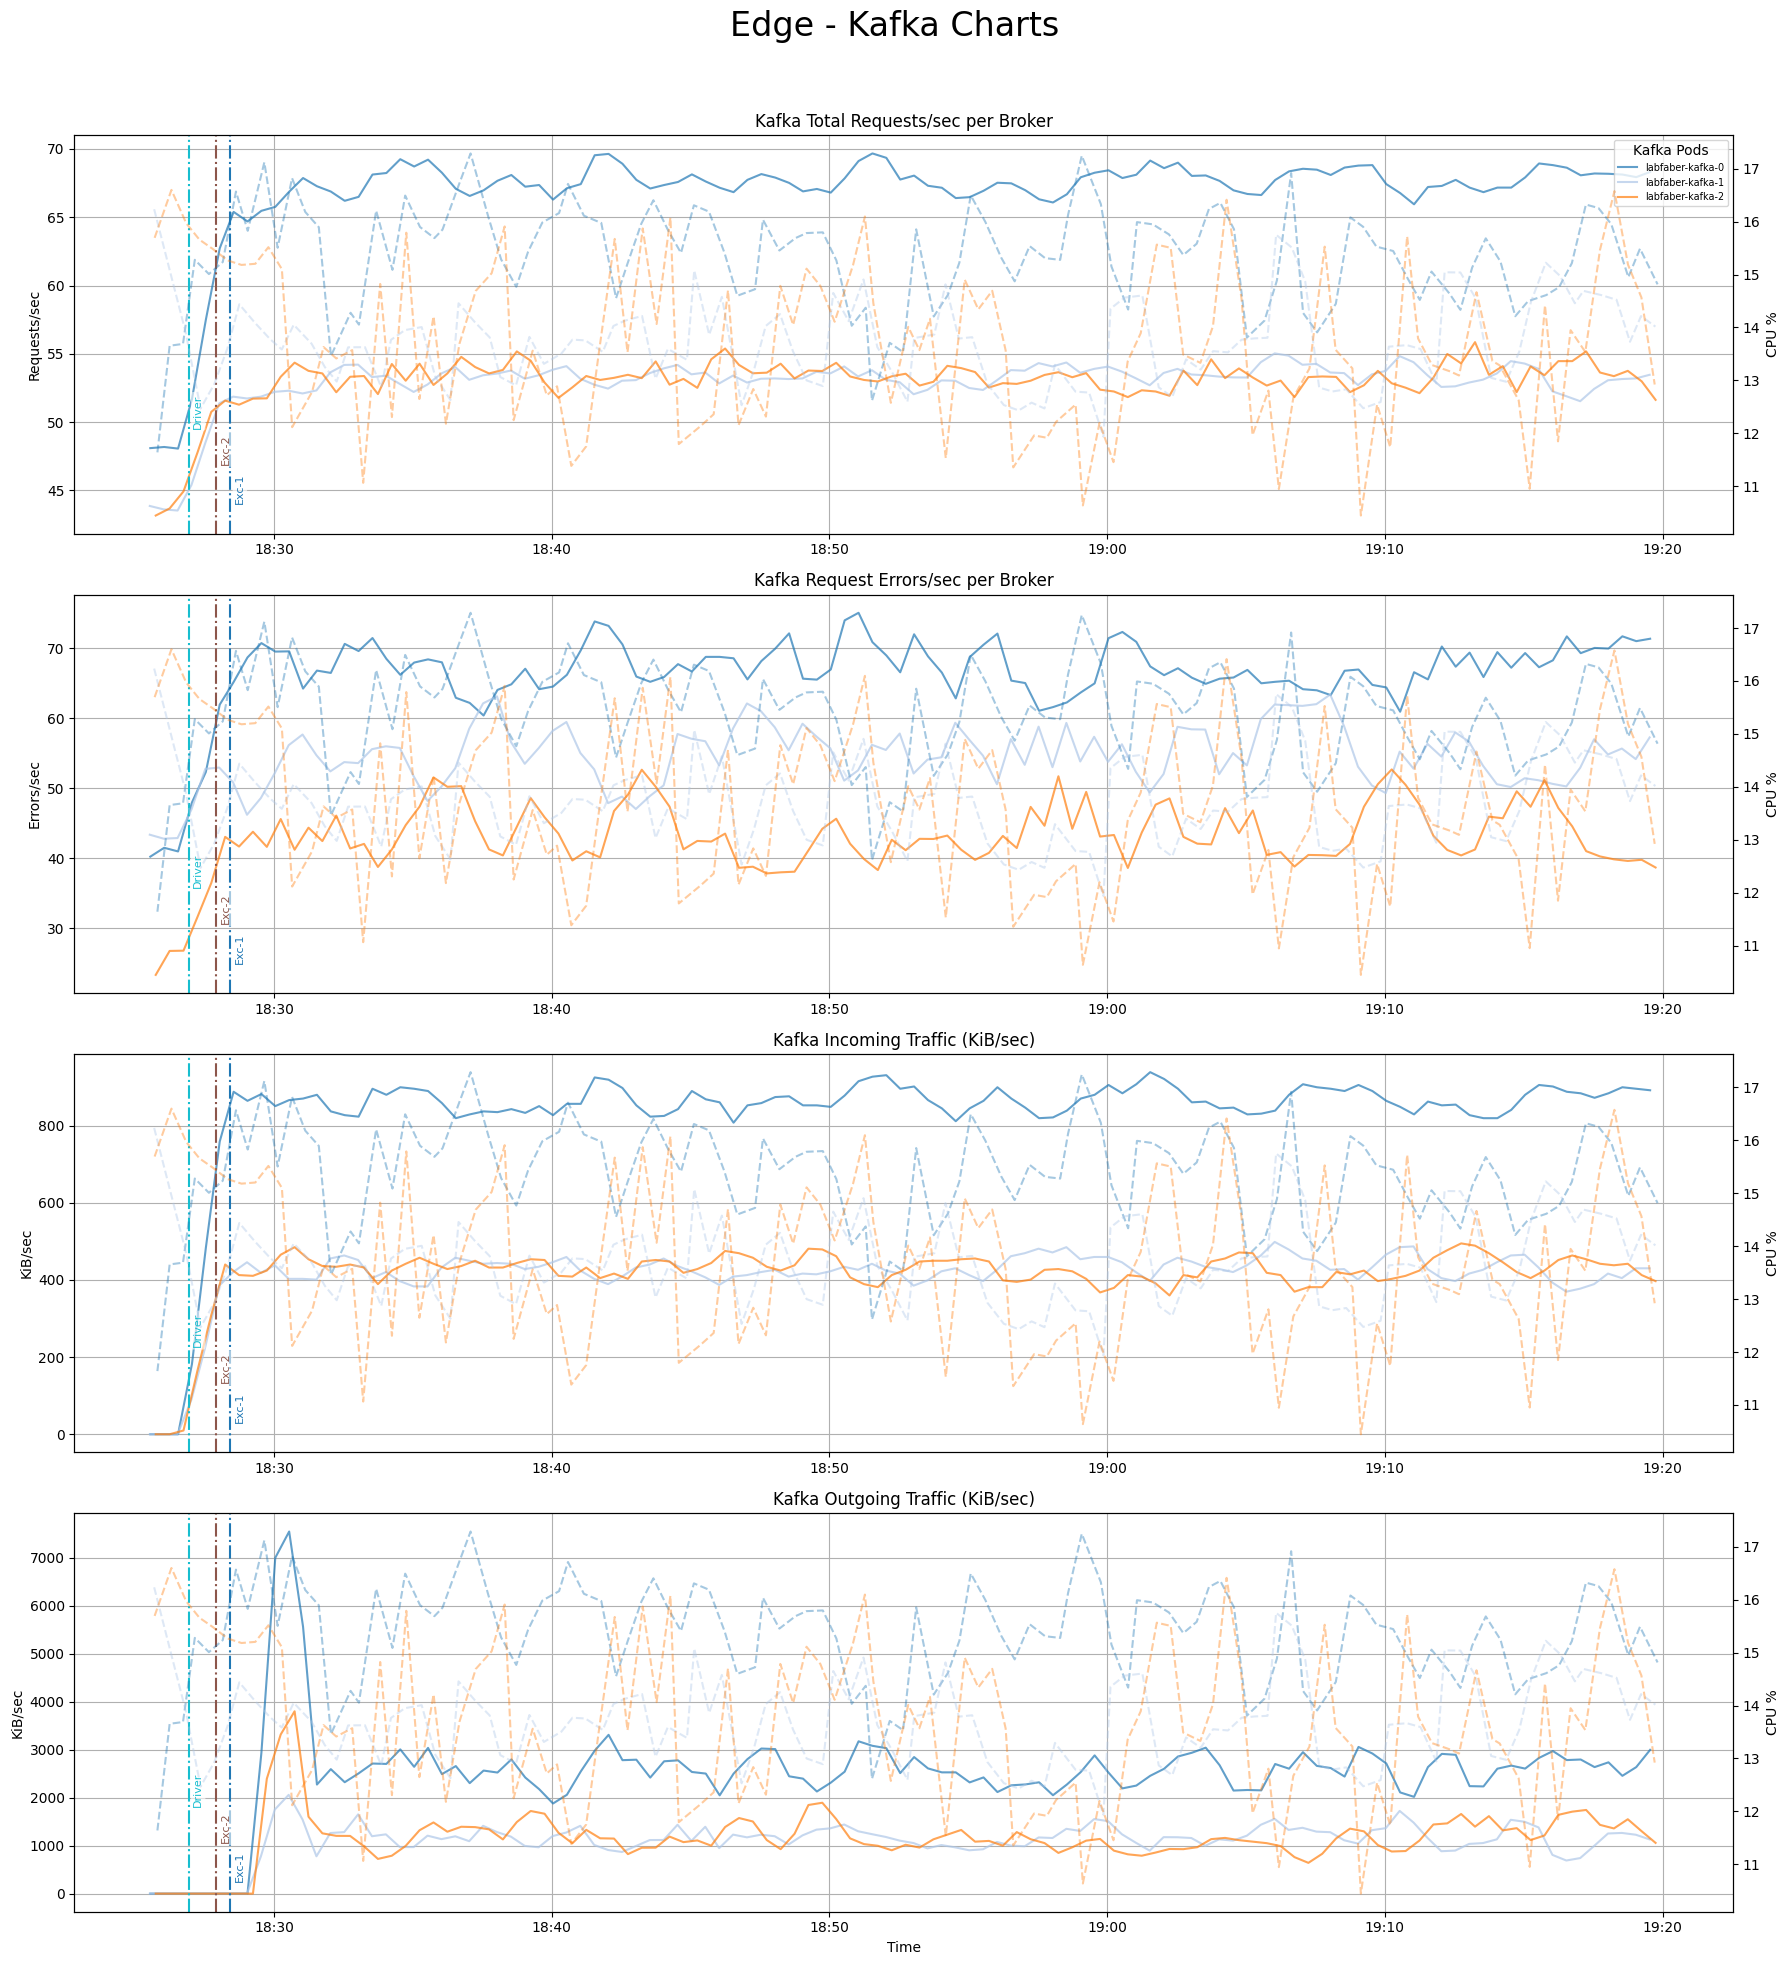

In [ ]:
kafka_charts(kafka_bytes_in, kafka_bytes_out, kafka_requests, kafka_requests_errors, kafka_messages_in, df_container_cpu_usage_seconds_total, df_kube_pod_status_phase, title="Edge - Kafka Charts", save_path="./kafka-charts-edge.png")

---

# Cloud Data

In [3]:
base_path = f"../../data/raw/{experiment_name}/{experiment_name}_cloud"

NODE_CPU_LIMITS = {
    'worker-pool-tauaf': 400.0,
    'worker-pool-tauaq': 400.0,
    'worker-pool-tauax': 400.0,
    'worker-pool-tauay': 400.0
}

memory = 8.192 * 2 # 16 GB

NODE_MEMORY_LIMITS = {
    'worker-pool-tauaf': memory,
    'worker-pool-tauaq': memory,
    'worker-pool-tauax': memory,
    'worker-pool-tauay': memory
}

df_container_cpu_usage_seconds_total = pd.read_parquet(base_path + "/container_cpu_usage_seconds_total.parquet")
df_container_memory_usage_bytes = pd.read_parquet(base_path + "/container_memory_usage_bytes.parquet")
df_kube_pod_status_phase = pd.read_parquet(base_path + "/kube_pod_status_phase.parquet")

kafka_bytes_in = pd.read_parquet(base_path + "/kafka_server_brokertopicmetrics_bytesin_total.parquet")
kafka_bytes_out = pd.read_parquet(base_path + "/kafka_server_brokertopicmetrics_bytesout_total.parquet")
kafka_messages_in = pd.read_parquet(base_path + "/kafka_server_brokertopicmetrics_messagesin_total.parquet")
kafka_requests = pd.read_parquet(base_path + "/kafka_network_requestmetrics_requests_total.parquet")
kafka_requests_errors = pd.read_parquet(base_path + "/kafka_network_requestmetrics_errors_total.parquet")

# === Load all MinIO metric CSVs ===
df_minio_incoming = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_incoming_total.parquet').reset_index(), start_time, end_time)
df_minio_total = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_total.parquet').reset_index(), start_time, end_time)
df_minio_waiting = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_waiting_total.parquet').reset_index(), start_time, end_time)
df_minio_errors = time_filter(pd.read_parquet(base_path + '/minio_s3_requests_errors_total.parquet').reset_index(), start_time, end_time)
df_minio_sent_bytes = time_filter(pd.read_parquet(base_path + '/minio_s3_traffic_sent_bytes.parquet').reset_index(), start_time, end_time)
df_minio_received_bytes = time_filter(pd.read_parquet(base_path + '/minio_s3_traffic_received_bytes.parquet').reset_index(), start_time, end_time)

df_container_cpu_usage_seconds_total = df_container_cpu_usage_seconds_total.reset_index()
df_container_memory_usage_bytes = df_container_memory_usage_bytes.reset_index()
df_kube_pod_status_phase = df_kube_pod_status_phase.reset_index()

kafka_bytes_in = kafka_bytes_in.reset_index()
kafka_bytes_out = kafka_bytes_out.reset_index()
kafka_messages_in = kafka_messages_in.reset_index()
kafka_requests = kafka_requests.reset_index()
kafka_requests_errors = kafka_requests_errors.reset_index()

df_container_cpu_usage_seconds_total = time_filter(df_container_cpu_usage_seconds_total, start_time, end_time)
df_container_memory_usage_bytes = time_filter(df_container_memory_usage_bytes, start_time, end_time)
df_kube_pod_status_phase = time_filter(df_kube_pod_status_phase, start_time, end_time)

kafka_bytes_in = time_filter(kafka_bytes_in, start_time, end_time)
kafka_bytes_out = time_filter(kafka_bytes_out, start_time, end_time)
kafka_messages_in = time_filter(kafka_messages_in, start_time, end_time)
kafka_requests = time_filter(kafka_requests, start_time, end_time)
kafka_requests_errors = time_filter(kafka_requests_errors, start_time, end_time)

selected_pods = get_selected_pods(df_kube_pod_status_phase)

df_kube_pod_status_phase = df_kube_pod_status_phase[df_kube_pod_status_phase["pod"].isin(selected_pods)]
df_status_cloud = df_kube_pod_status_phase.copy()
df_container_cpu_usage_seconds_total_filtered = df_container_cpu_usage_seconds_total[df_container_cpu_usage_seconds_total["pod"].isin(selected_pods)]
df_cpu_cloud = df_container_cpu_usage_seconds_total_filtered.copy()
df_container_memory_usage_bytes_filtered = df_container_memory_usage_bytes[df_container_memory_usage_bytes["pod"].isin(selected_pods)]
df_memory_cloud = df_container_memory_usage_bytes_filtered.copy()

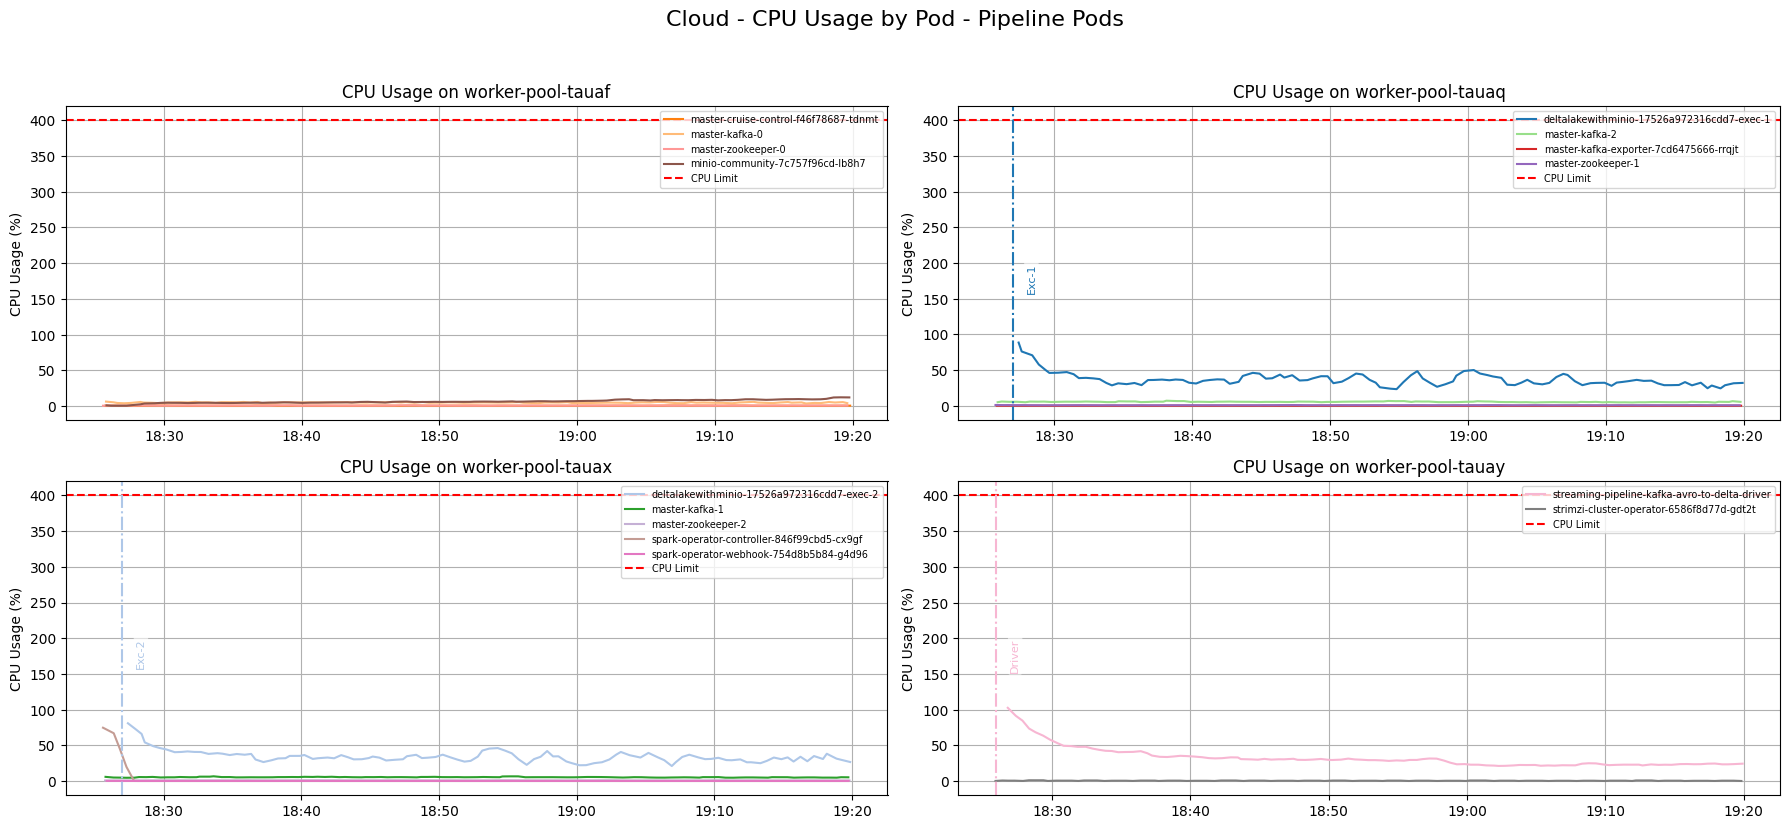

In [ ]:
cpu_chart(df_container_cpu_usage_seconds_total_filtered, df_kube_pod_status_phase, title="Cloud - CPU Usage by Pod - Pipeline Pods", node_cpu_limits=NODE_CPU_LIMITS)

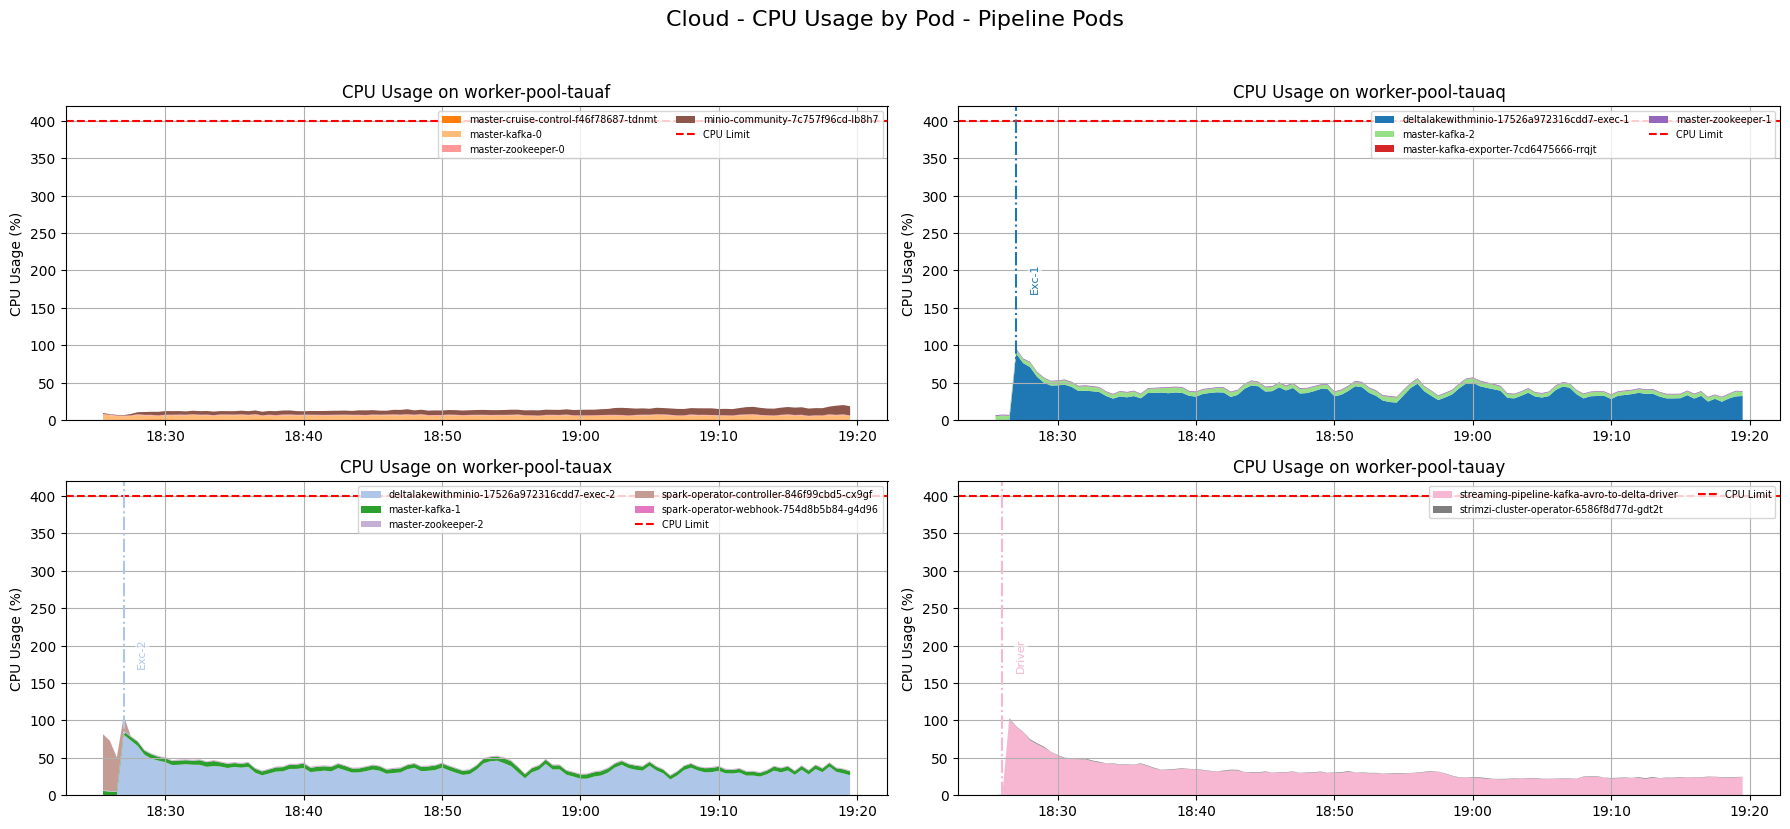

In [ ]:
cpu_chart_stacked(df_container_cpu_usage_seconds_total_filtered, df_kube_pod_status_phase, title="Cloud - CPU Usage by Pod - Pipeline Pods", node_cpu_limits=NODE_CPU_LIMITS, save_path="./cpu-cloud-pipeline-pods.png")

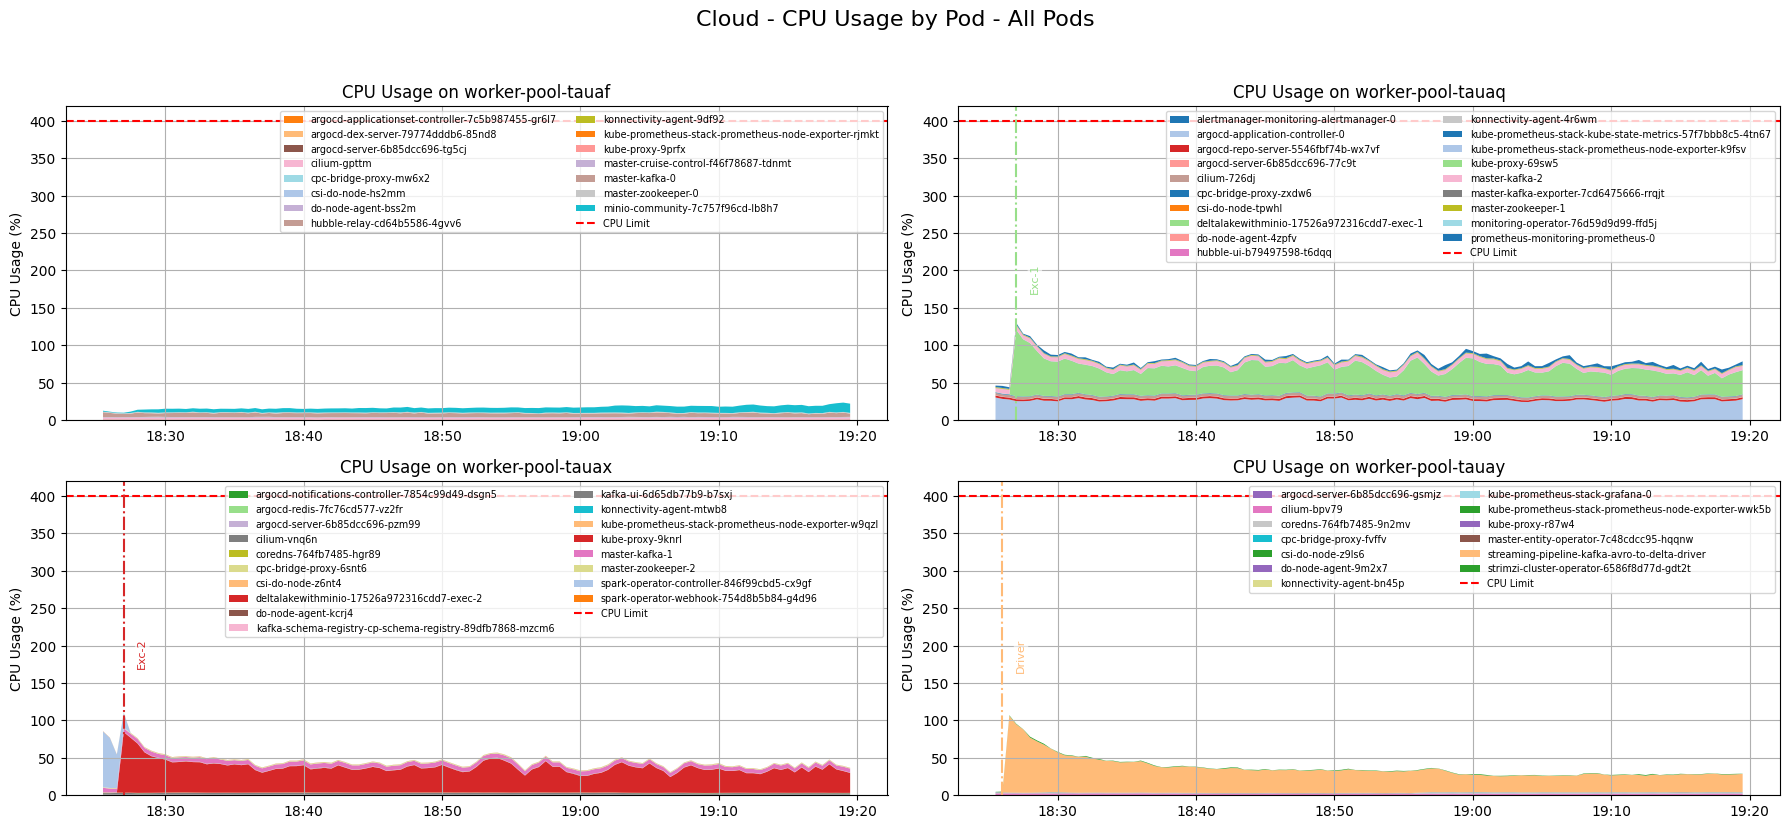

In [ ]:
cpu_chart_stacked(df_container_cpu_usage_seconds_total, df_kube_pod_status_phase, title="Cloud - CPU Usage by Pod - All Pods", node_cpu_limits=NODE_CPU_LIMITS, save_path="./cpu-cloud-all-pods.png")

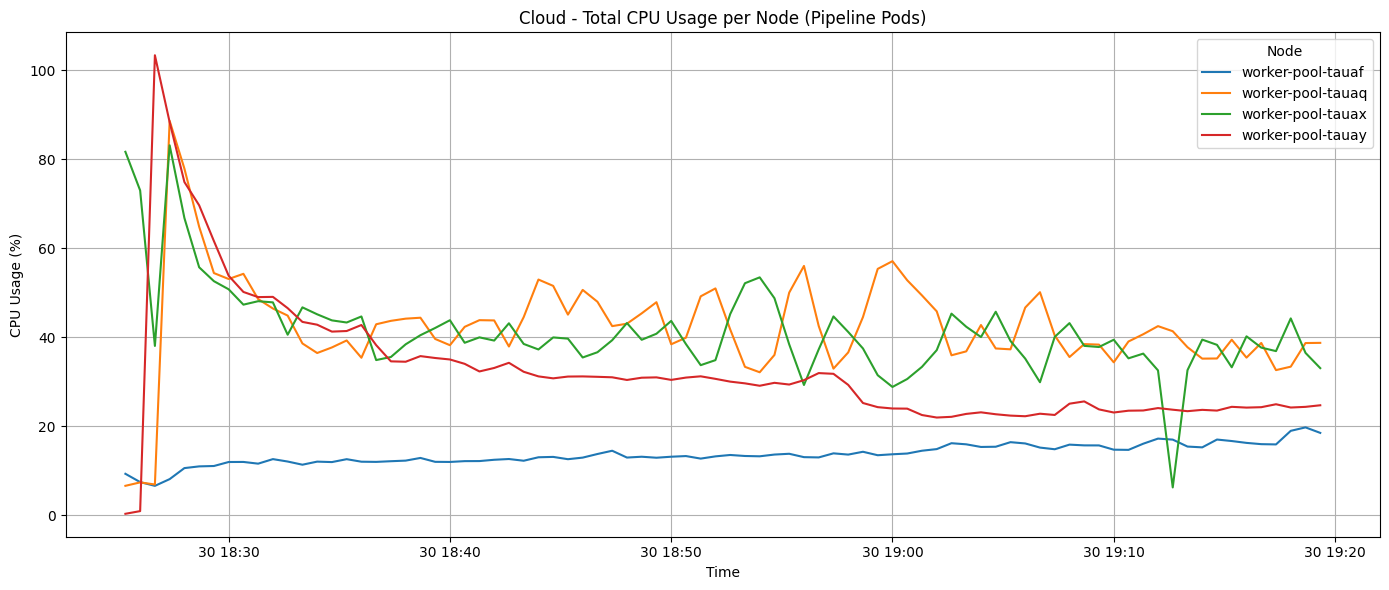

In [ ]:
cpu_chart_nodes(df_container_cpu_usage_seconds_total_filtered, "Cloud - Total CPU Usage per Node (Pipeline Pods)", save_path="./cpu-cloud-total-pipeline-pods.png")

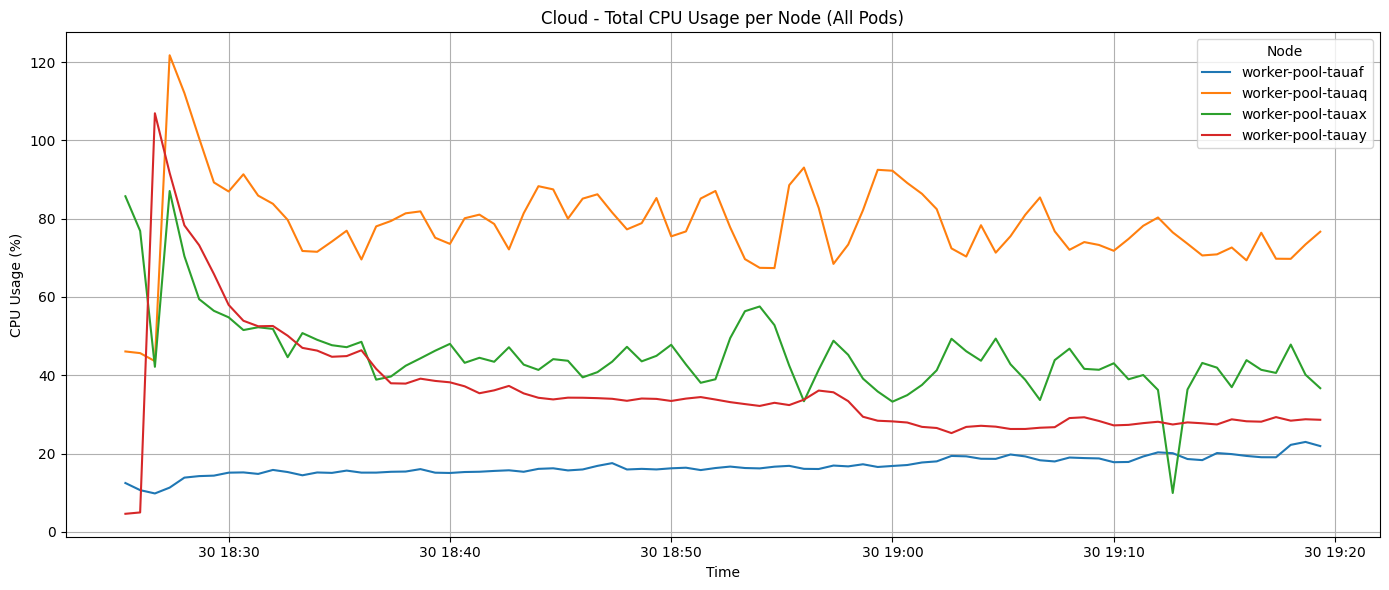

In [ ]:
cpu_chart_nodes(df_container_cpu_usage_seconds_total, "Cloud - Total CPU Usage per Node (All Pods)", save_path="./cpu-cloud-total-all-pods.png")

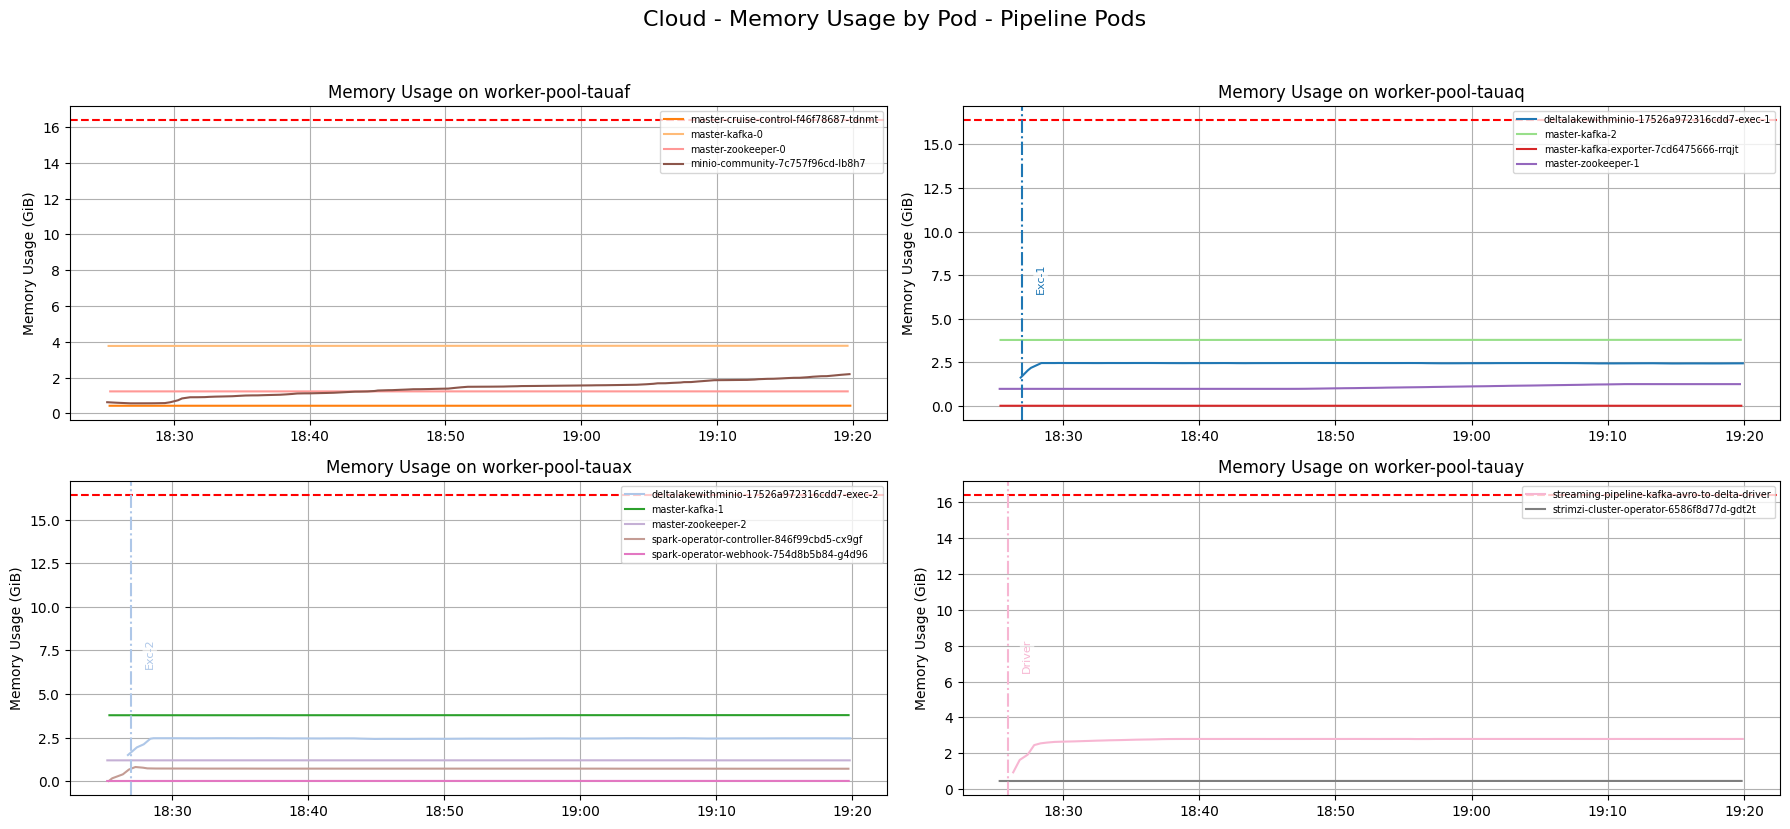

In [ ]:
memory_chart(df_container_memory_usage_bytes_filtered, df_kube_pod_status_phase, title="Cloud - Memory Usage by Pod - Pipeline Pods", node_memory_limits=NODE_MEMORY_LIMITS)

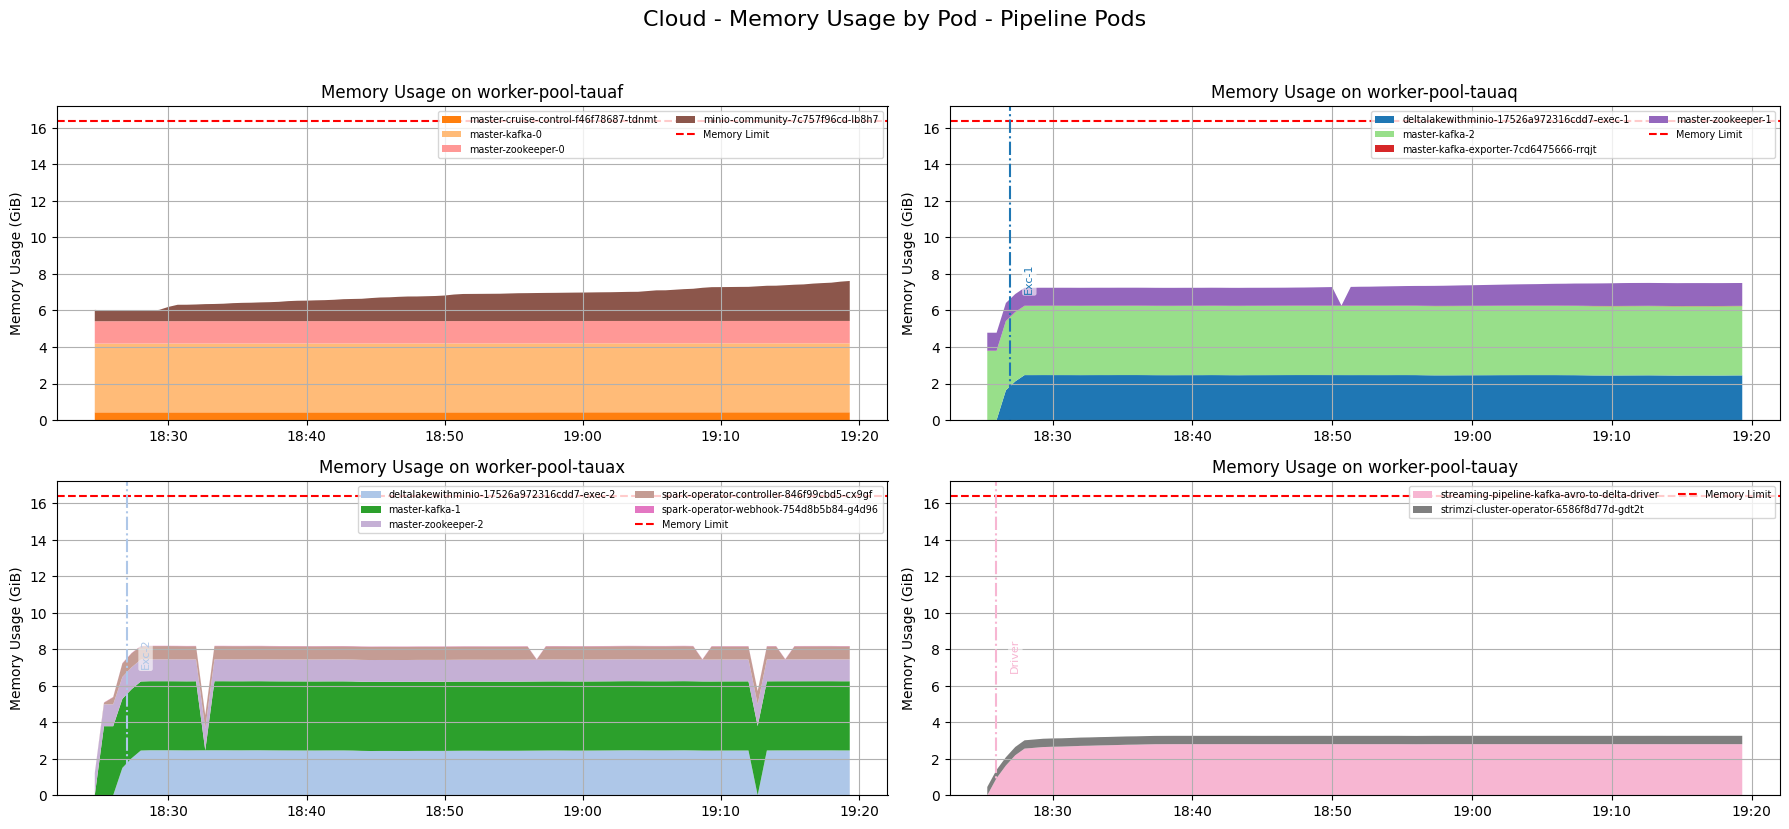

In [ ]:
memory_chart_stacked(df_container_memory_usage_bytes_filtered, df_kube_pod_status_phase, title="Cloud - Memory Usage by Pod - Pipeline Pods", node_memory_limits=NODE_MEMORY_LIMITS, save_path="./memory-cloud-pipeline-pods.png")

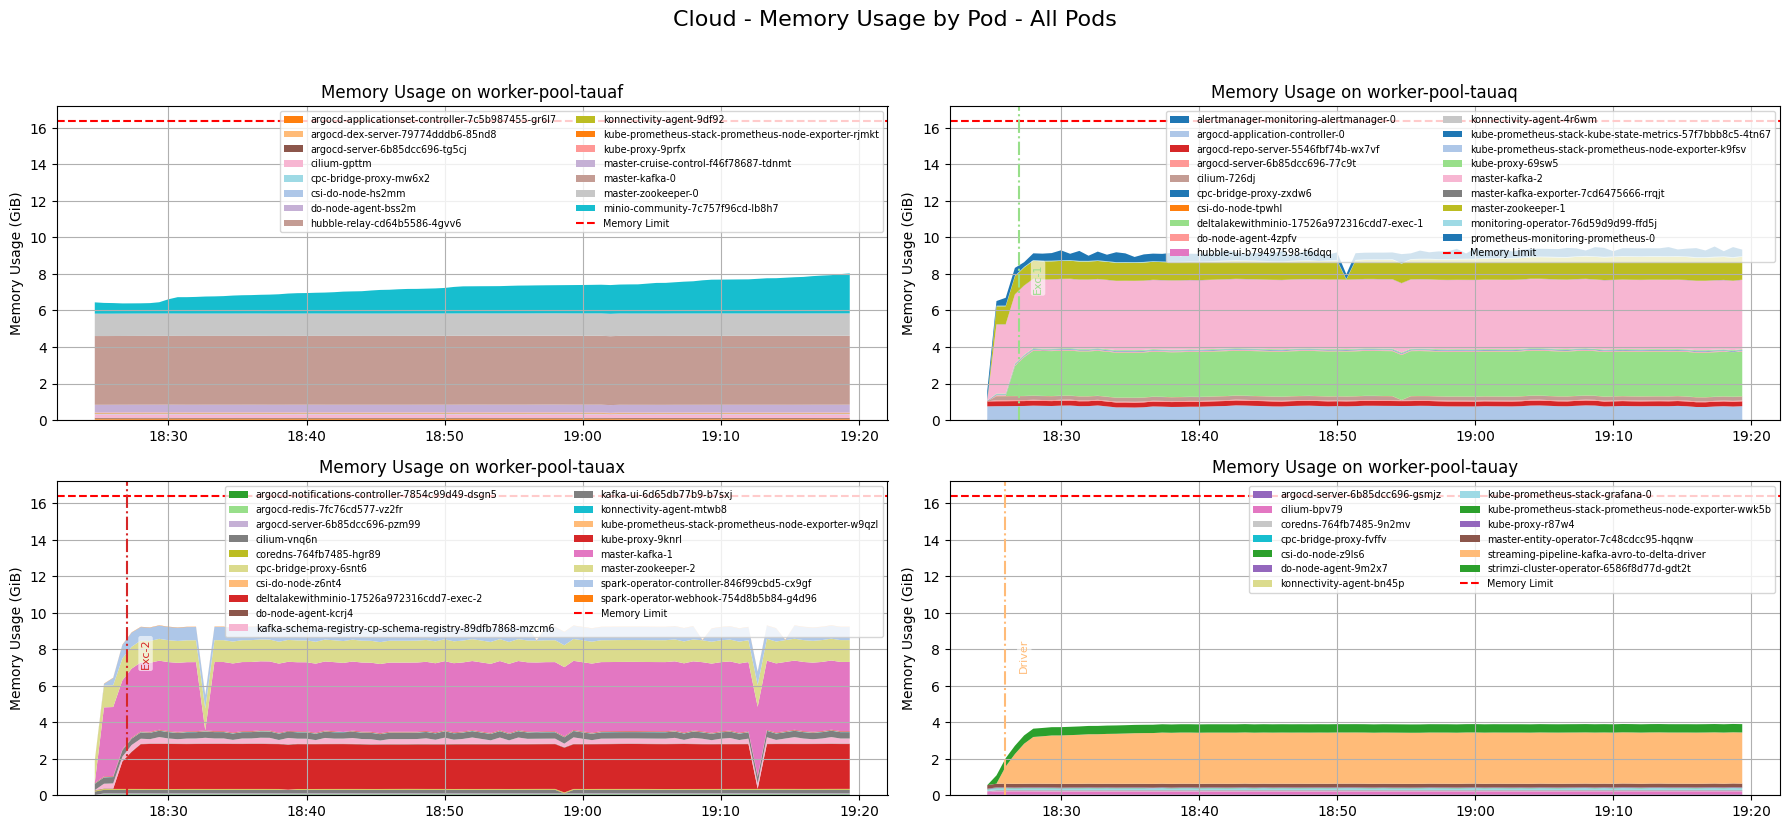

In [ ]:
memory_chart_stacked(df_container_memory_usage_bytes, df_kube_pod_status_phase, title="Cloud - Memory Usage by Pod - All Pods", node_memory_limits=NODE_MEMORY_LIMITS, save_path="./memory-cloud-all-pods.png")

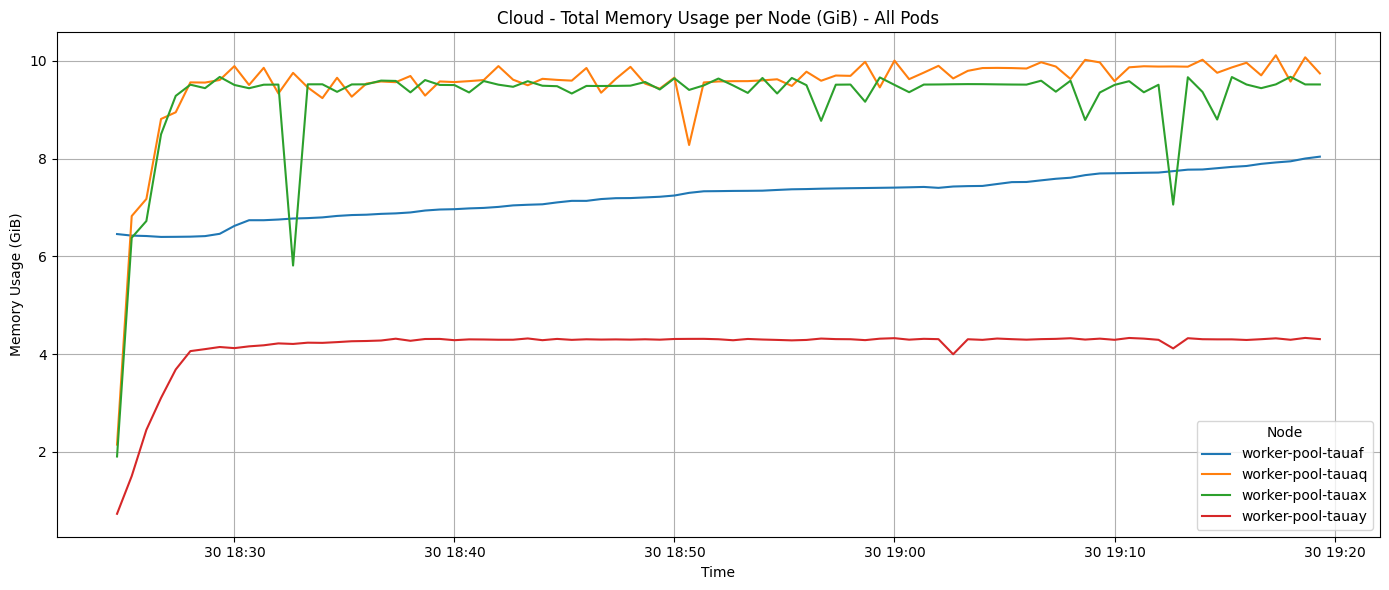

In [ ]:
memory_chart_nodes(df_container_memory_usage_bytes, "Cloud - Total Memory Usage per Node (GiB) - All Pods", save_path="./memory-cloud-total-all-pods.png")

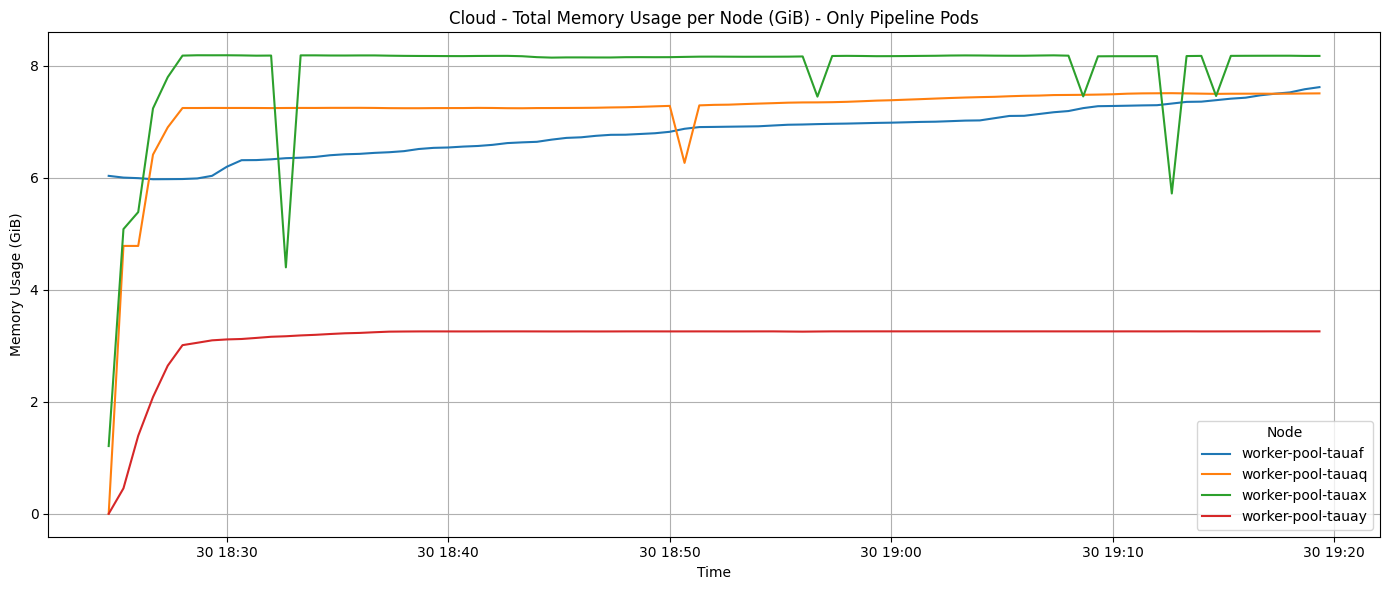

In [ ]:
memory_chart_nodes(df_container_memory_usage_bytes_filtered, "Cloud - Total Memory Usage per Node (GiB) - Only Pipeline Pods", save_path="./memory-cloud-total-pipeline-pods.png")

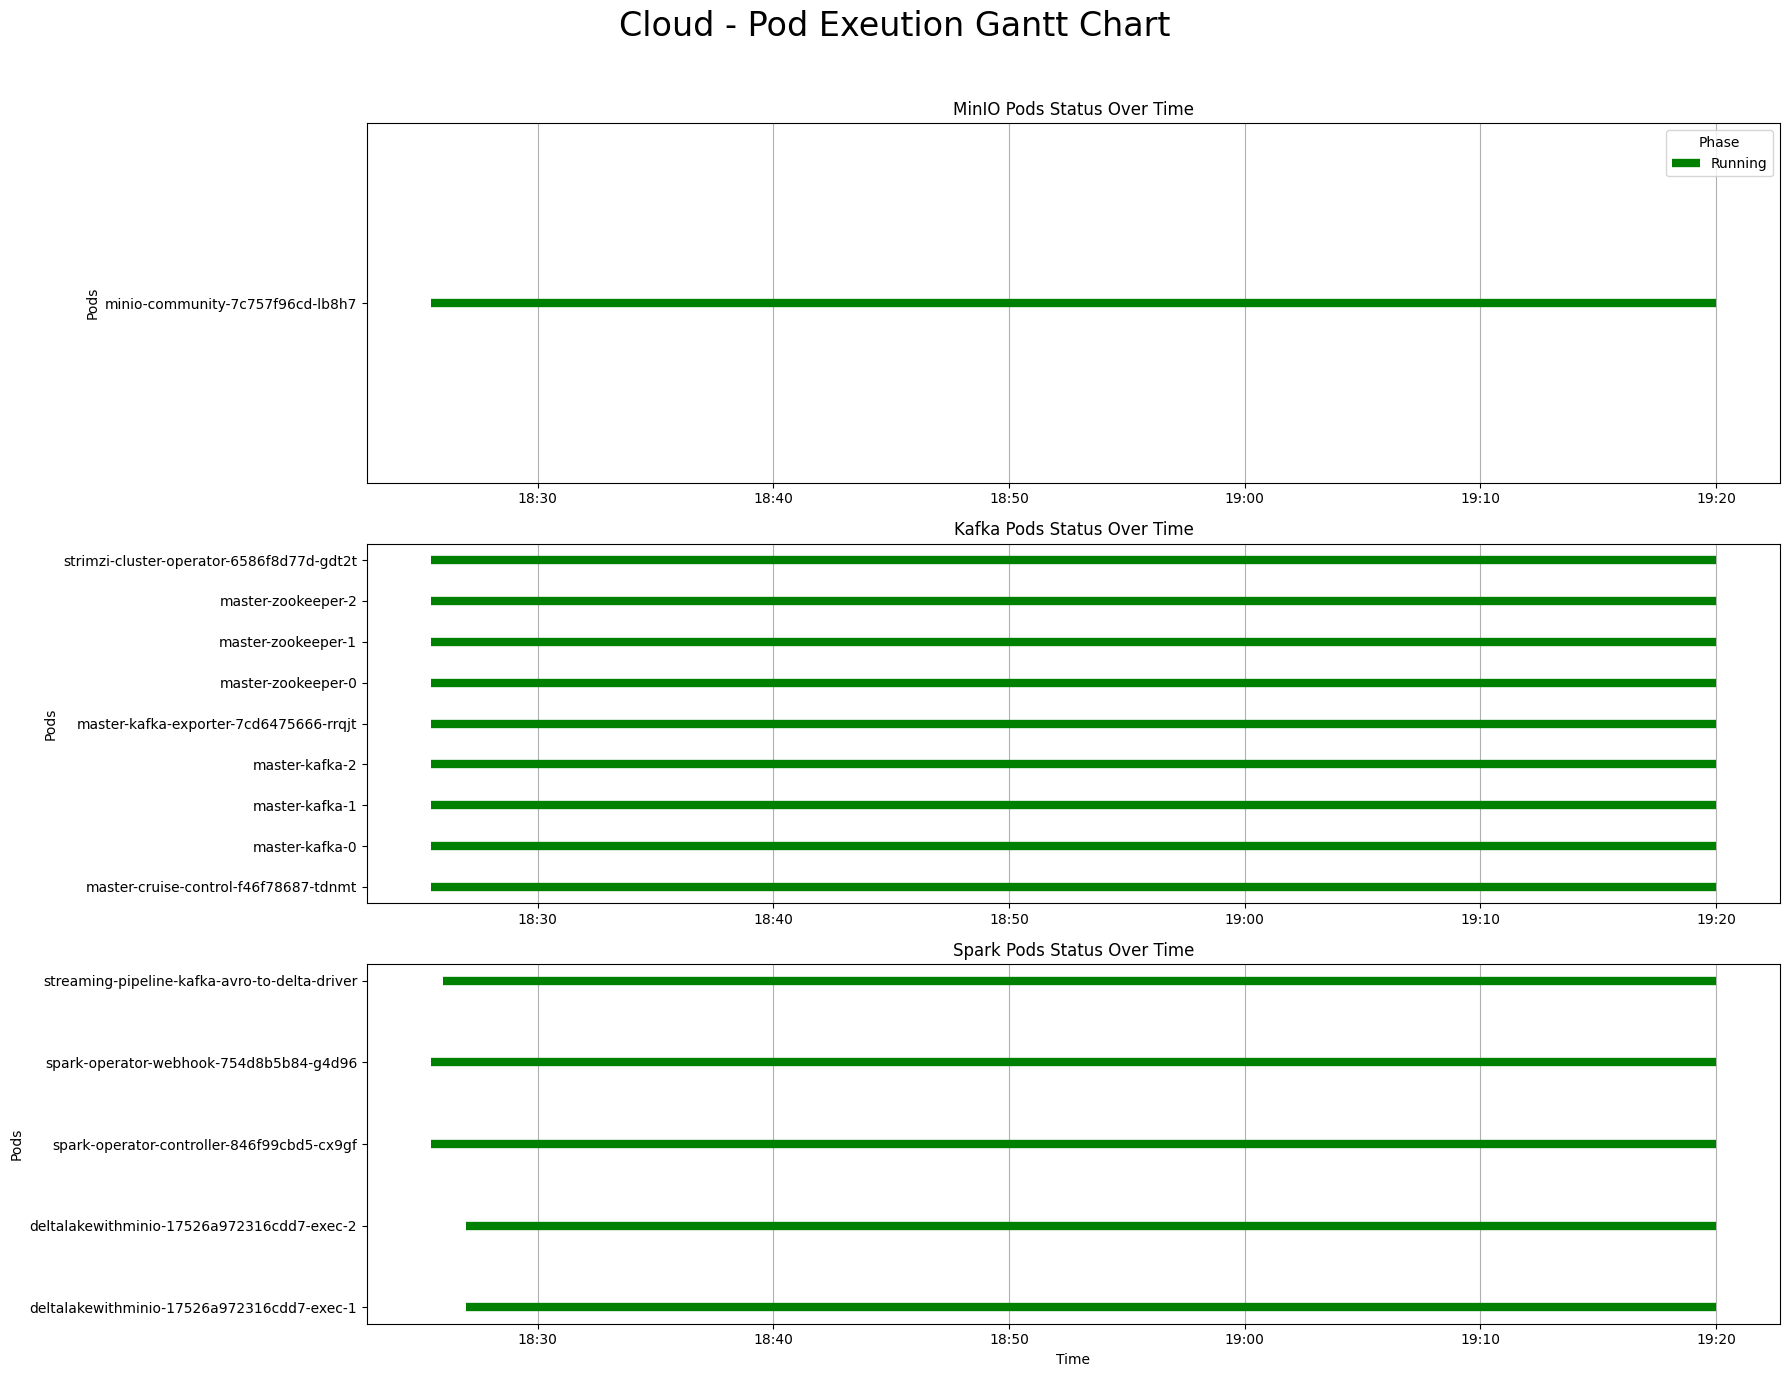

In [ ]:
gantt_chart(df_kube_pod_status_phase, title="Cloud - Pod Exeution Gantt Chart", save_path="./execution-gantt-cloud.png")

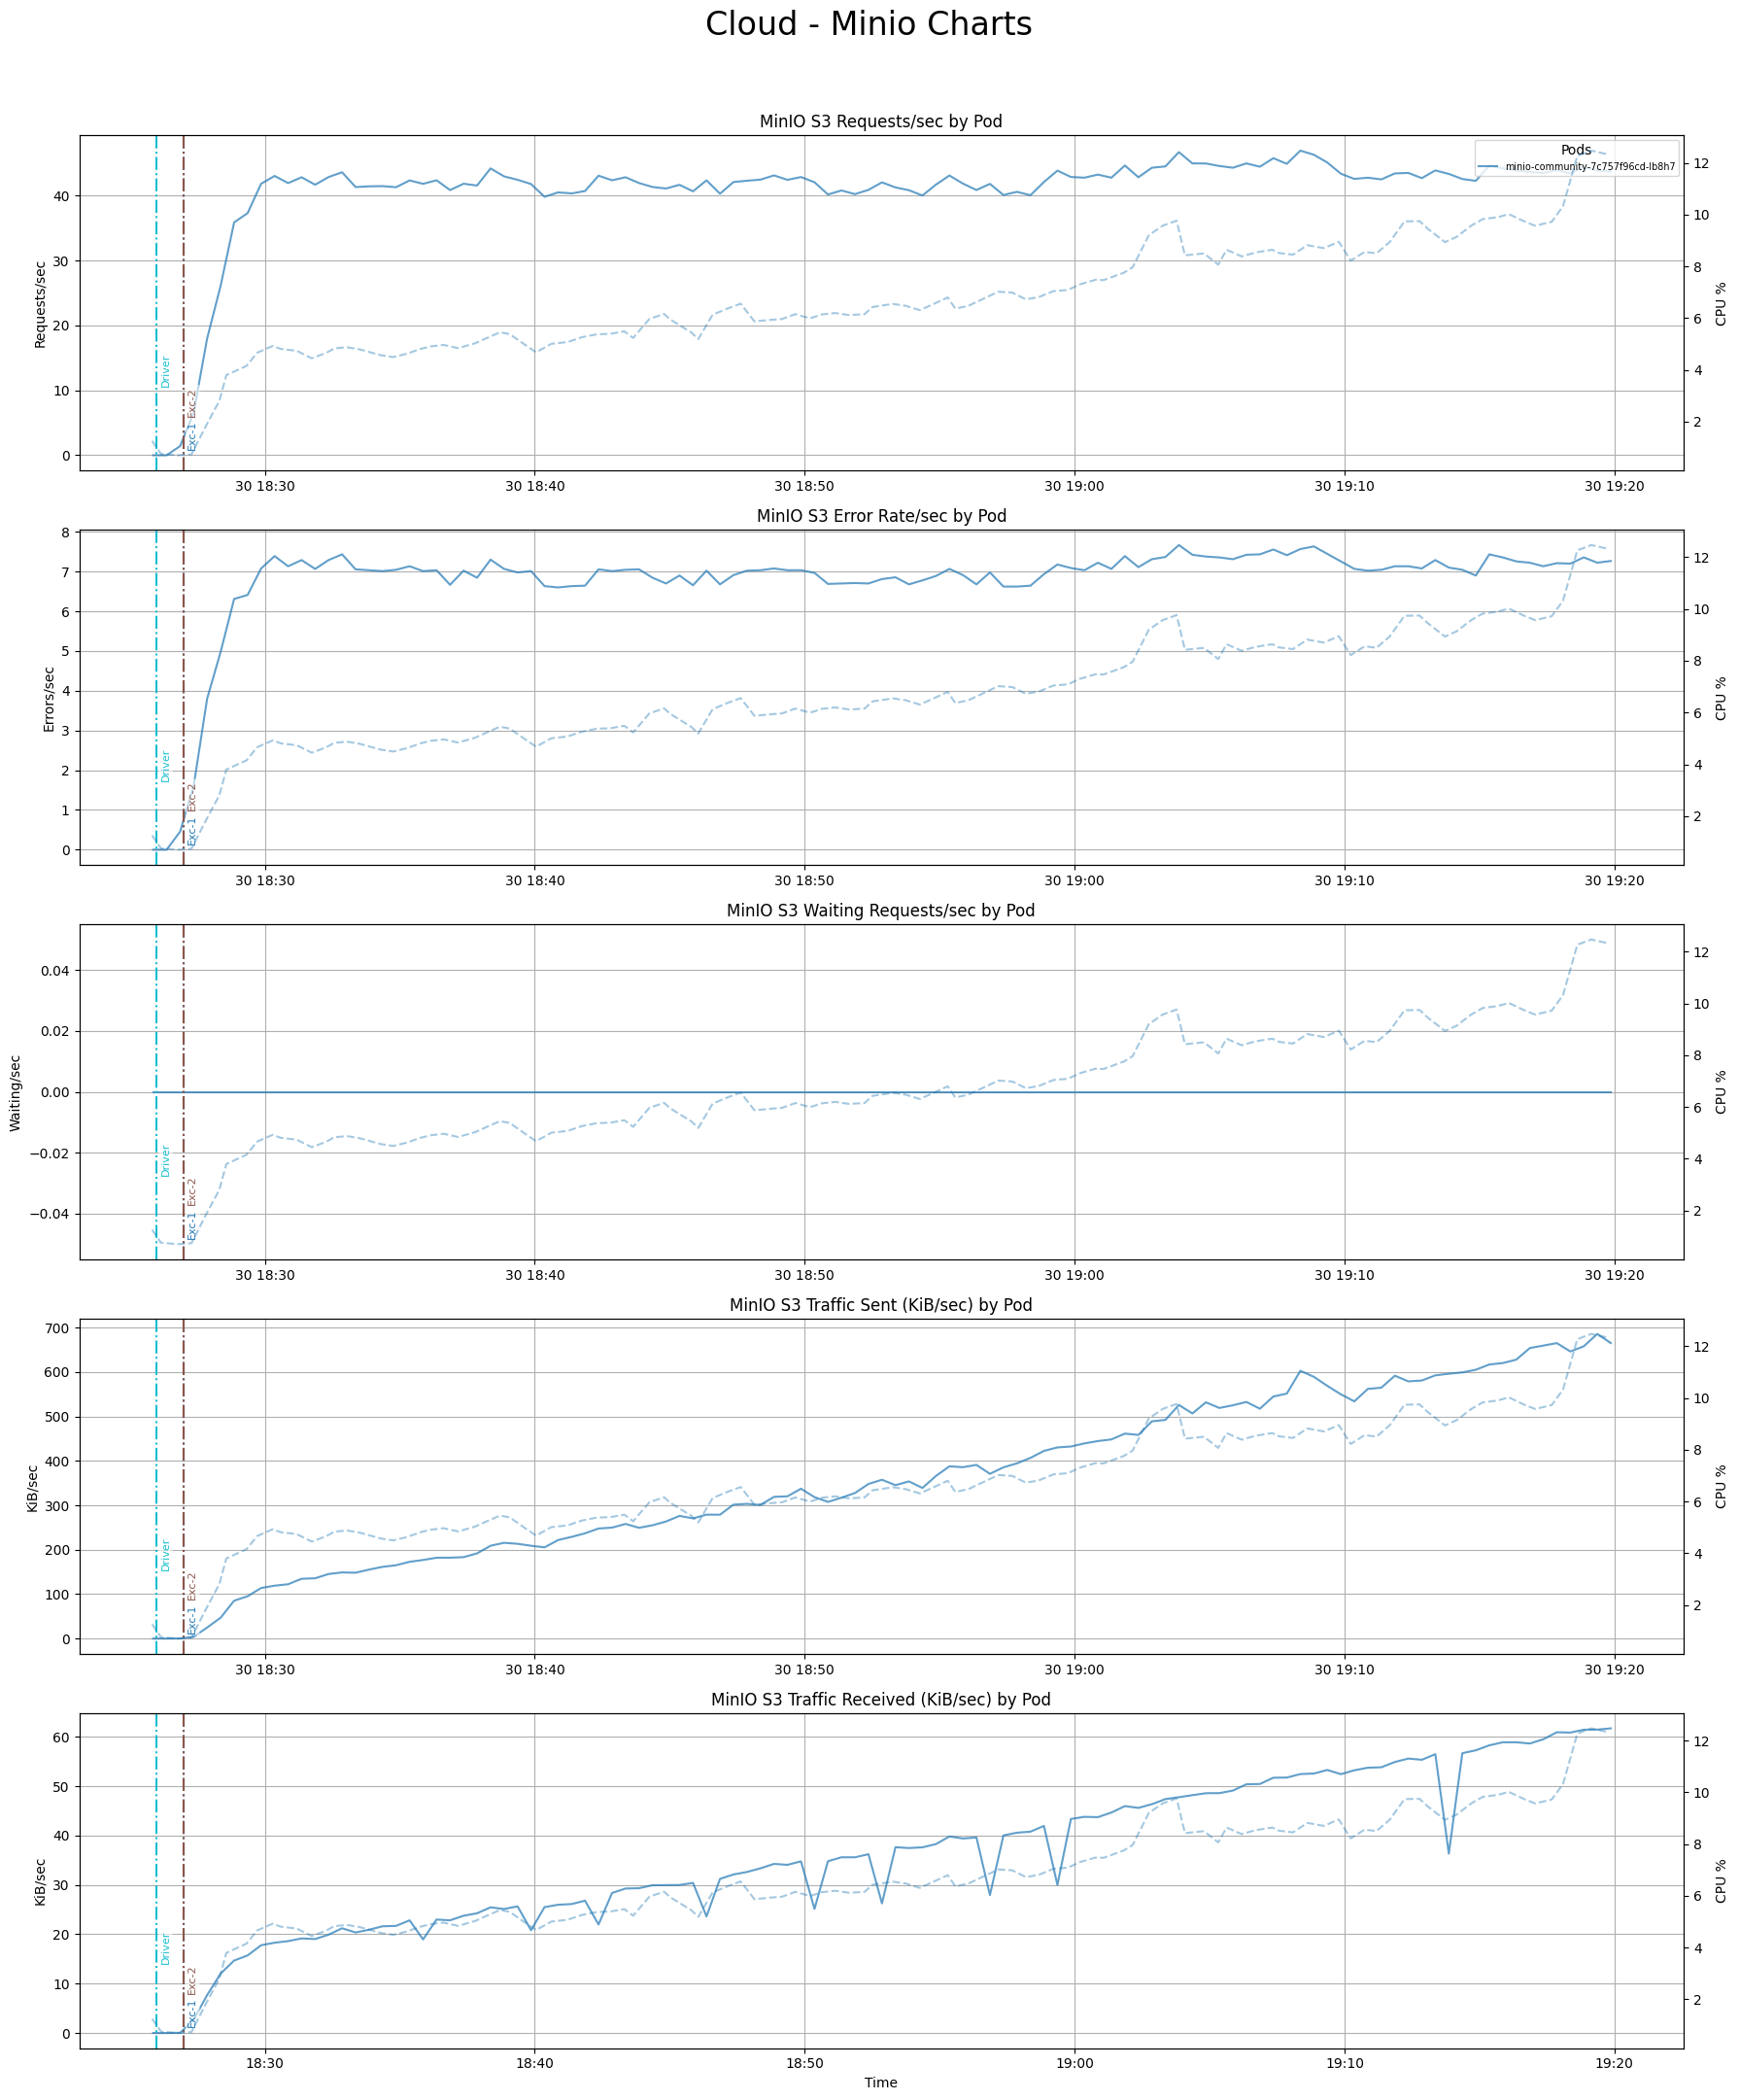

In [ ]:
minio_charts(df_minio_total=df_minio_total, df_minio_errors=df_minio_errors, df_minio_waiting=df_minio_waiting, df_minio_sent_bytes=df_minio_sent_bytes, df_minio_received_bytes=df_minio_received_bytes, df_cpu=df_container_cpu_usage_seconds_total, df_status=df_kube_pod_status_phase, title="Cloud - Minio Charts", save_path="./minio-charts-cloud.png")

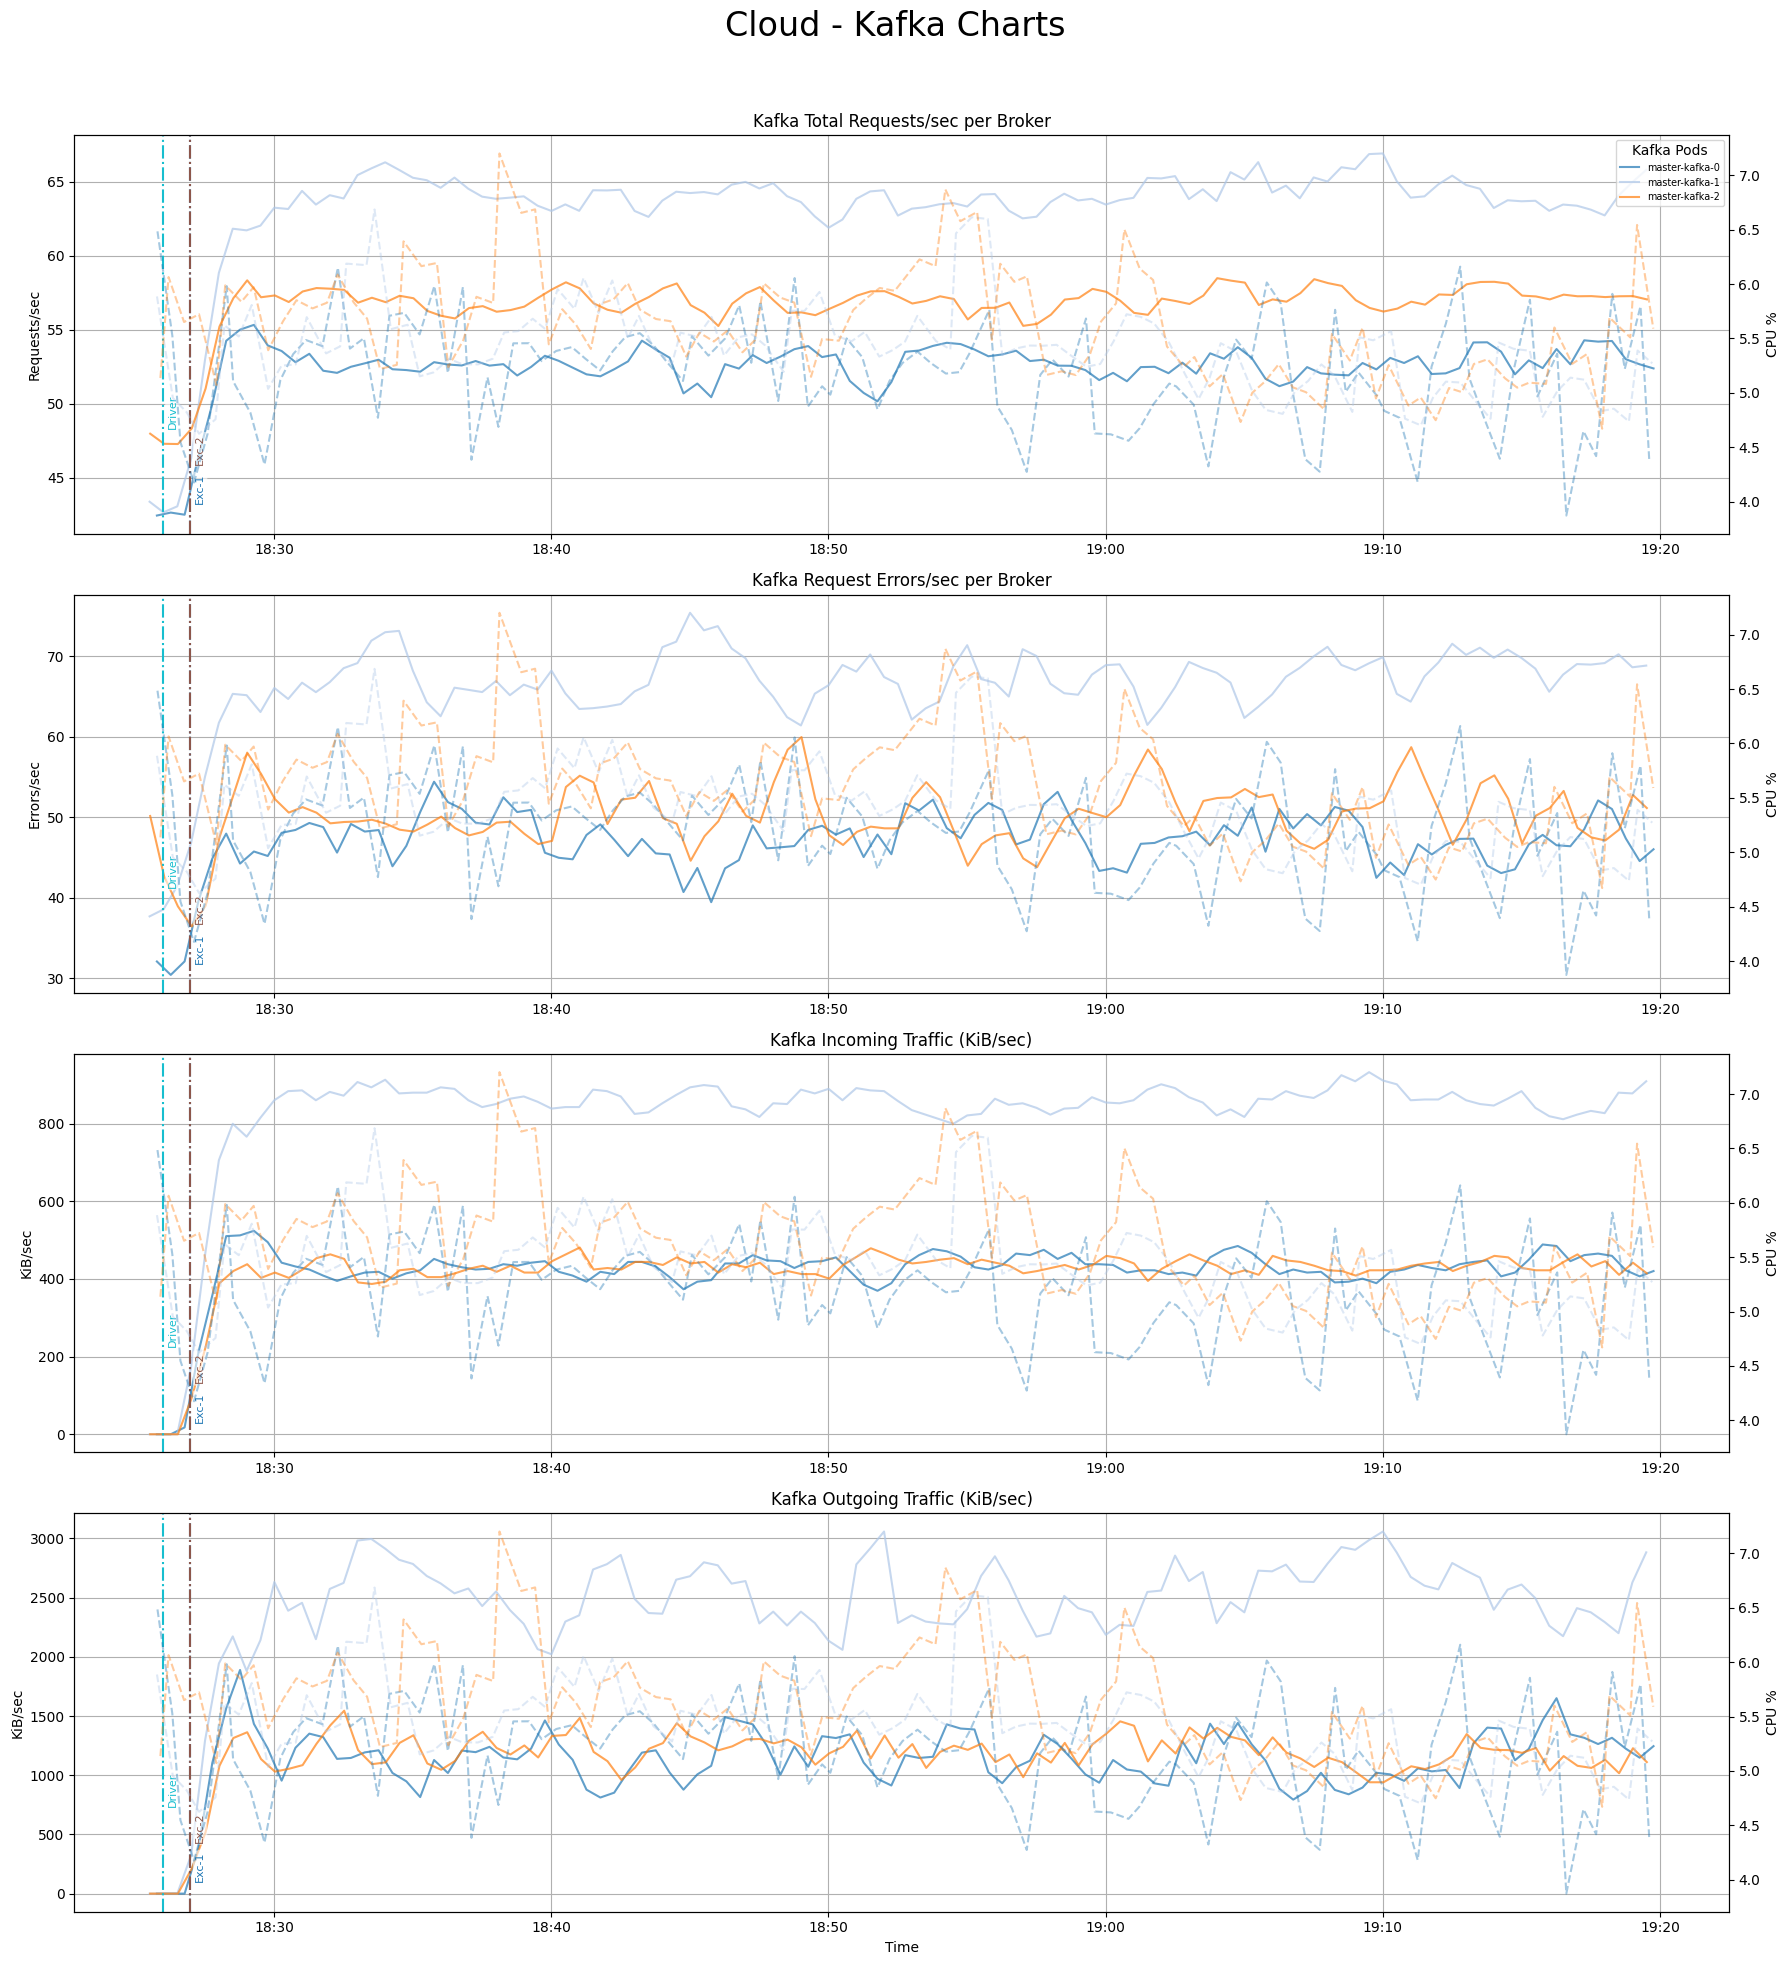

In [ ]:
kafka_charts(kafka_bytes_in, kafka_bytes_out, kafka_requests, kafka_requests_errors, kafka_messages_in, df_container_cpu_usage_seconds_total, df_kube_pod_status_phase, title="Cloud - Kafka Charts", save_path="./kafka-charts-cloud.png")

# Unified gannt

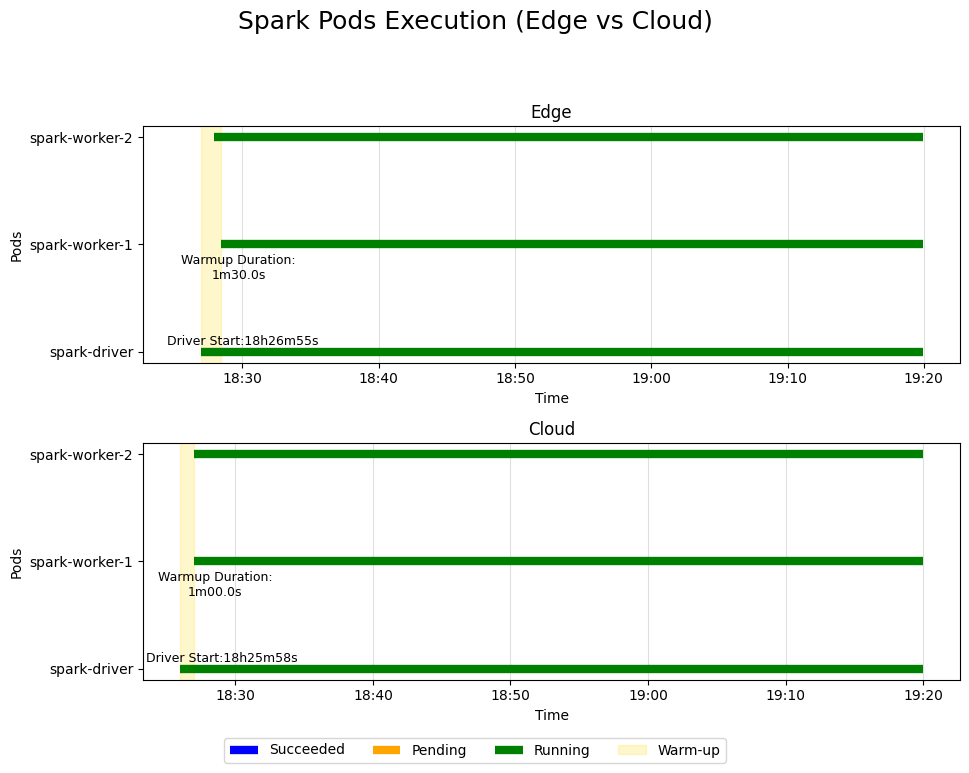

In [4]:
from charts import spark_gantt_edge_cloud

# Example usage (replace with your actual DataFrames):
# df_edge and df_cloud are the same schema you used for the original Gantt.
spark_gantt_edge_cloud(df_status_edge, df_status_cloud, save_path="./spark_gantt_edge_cloud.png")

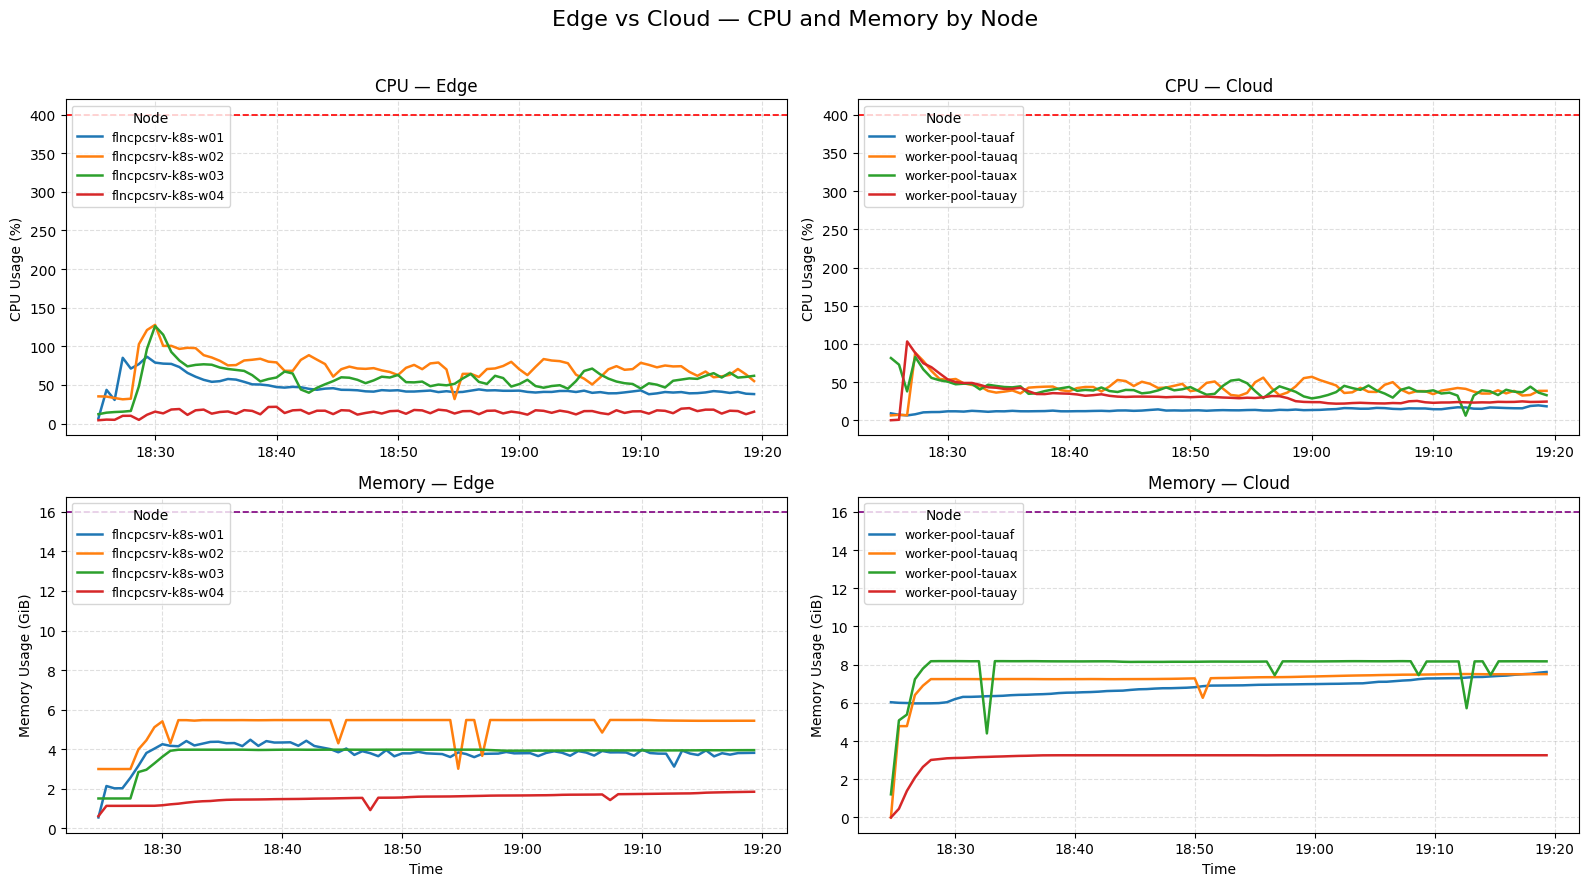

In [5]:
from charts import node_resources_2x2

df_cpu_cloud["environment"] = "Cloud"
df_memory_cloud["environment"] = "Cloud"
df_cpu_edge["environment"] = "Edge"
df_memory_edge["environment"] = "Edge"

df_cpu_all = pd.concat([df_cpu_edge, df_cpu_cloud])
df_mem_all = pd.concat([df_memory_edge, df_memory_cloud])

# df_cpu_all and df_mem_all must include an 'environment' column with 'Edge' or 'Cloud'
node_resources_2x2(df_cpu_all, df_mem_all, save_path="./resources_2x2.png")
